# [Bridging Language Models with Python with Instructor, Pydantic, and OpenAI’s function calls.](https://readmedium.com/bridging-language-model-with-python-with-instructor-pydantic-and-openais-function-calling-f32fb1cdb401)


## Introduce to Instructor

Instructor **makes it easy to get structured data** like JSON from LLMs like GPT-3.5, GPT-4, GPT-4-Vision, and open-source models including Mistral/Mixtral, Anyscale, Ollama, and llama-cpp-python.



It stands out for its **simplicity(đơn giản)**, **transparency(rõ ràng)**, and **user-centric design(thiết kế lấy người dùng làm trung tâm)**, built on top of Pydantic. Instructor helps you **manage validation context**, retries with **Tenacity**, and streaming **Lists** and **Partial** responses.(Người hướng dẫn giúp bạn quản lý bối cảnh xác thực, thử lại với Độ bền và truyền trực tuyến Danh sách và phản hồi một phần.)



## Why use Instructor?

### No New standards

Instructor is built on top of Pydantic and OpenAI, which will be familiar to many developers already. But, since many llm providers support the OpenAI API spec, you can use many closed source and open source providers like Anyscale, Together, Groq, Ollama, and Llama-cpp-python. [Instructor được xây dựng dựa trên Pydantic và OpenAI, những thứ đã quen thuộc với nhiều nhà phát triển. Tuy nhiên, vì nhiều nhà cung cấp llm hỗ trợ thông số API OpenAI nên bạn có thể sử dụng nhiều nhà cung cấp nguồn đóng và nguồn mở như Anyscale, Together, Groq, Ollama và Llama-cpp-python.]

Check out how we connect with [open source](https://python.useinstructor.com/blog/2024/03/07/open-source-local-structured-output-pydantic-json-openai/#together-ai)

In [ ]:
!pip install --upgrade instructor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.1/70.1 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.2/325.2 kB 7.8 MB/s eta 0:00:00
  Attempting uninstall: jiter
    Found existing installation: jiter 0.7.0
    Uninstalling jiter-0.7.0:
      Successfully uninstalled jiter-0.7.0


Start by downloading [Ollama](https://github.com/ollama/ollama), and then pull a model such as Llama 2 or Mistral. [Bắt đầu bằng cách tải xuống Ollama, sau đó lấy một mô hình như Llama 2 hoặc Mistral.] x


download platform ollama và sử dụng

**llama-cpp-python**

In [ ]:
!pip install llama-cpp-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 MB 7.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.4 MB/s eta 0:00:00
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 423, in run
    _, build_failures = build(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/wheel_builder.py", line 319, in build
    wheel_file = _build_one(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/wheel_builder.py", l

In [ ]:
import llama_cpp
import instructor

from llama_cpp.llama_speculative import LlamaPromptLookupDecoding
from pydantic import BaseModel


llama = llama_cpp.Llama(
    model_path="../../models/OpenHermes-2.5-Mistral-7B-GGUF/openhermes-2.5-mistral-7b.Q4_K_M.gguf",
    n_gpu_layers=-1,
    chat_format="chatml",
    n_ctx=2048,
    draft_model=LlamaPromptLookupDecoding(num_pred_tokens=2),
    logits_all=True,
    verbose=False,
)


create = instructor.patch(
    create=llama.create_chat_completion_openai_v1,
    mode=instructor.Mode.JSON_SCHEMA,
)

class UserDetail(BaseModel):
    name: str
    age: int


user = create(
    messages=[
        {
            "role": "user",
            "content": "Extract `Jason is 30 years old`",
        }
    ],
    response_model=UserDetail,
)

print(user)
#> name='Jason' age=30


ModuleNotFoundError: No module named 'llama_cpp'

**[Source open openai FREE](https://github.com/chatanywhere/GPT_API_free?tab=readme-ov-file)**

In [ ]:
from openai import OpenAI


# **Replace "YOUR_CHATANYWHERE_API_KEY" with your actual ChatAnywhere API key**
client = OpenAI(
    api_key="sk-RYiDonFCU85Bfr242X2POvCBhlhfHlz8knZQoVjWVJw180s6",  # Use correct API key
    base_url="https://api.chatanywhere.org"
)

client = instructor.patch(client)
candidate_queries = []

for doc in relevant_documents:
    candidate = client.chat.completions.create(
        model="gpt-4",
        response_model=QueryForPassage,
        messages=[
            {
                "role": "system",
                "content": """You are an expert AI assisting us in creating a high quality, diverse synthetic dataset to train Information Retrieval models. Your role is to analyse the document chunk given to you and provide us with high quality potential queries.""",
            },
            {"role": "user", "content": doc},
        ],
    )
    candidate_queries.append(candidate)
    break

```
client = OpenAI(
    api_key="sk-RYiDonFCU85Bfr242X2POvCBhlhfHlz8knZQoVjWVJw180s6",  # Use correct API key
    base_url="https://api.chatanywhere.org"
)

client = instructor.patch(client)

```


while instructor client for openai, In function create create **subfunction response_model** :


```
def create(response_model=Type[T]) -> T:
```



### Pydantic over Raw Schema

I find many prompt building tools to be overly complex and difficult to use, they might be simple to get started with a trivial examples but once you need more control, you have to wish they were simpler. Instructor does the least amount of work to get the job done.

[Tôi nhận thấy nhiều công cụ xây dựng nhanh chóng quá phức tạp và khó sử dụng, chúng có thể đơn giản để bắt đầu với những ví dụ tầm thường nhưng một khi bạn cần kiểm soát nhiều hơn, bạn phải ước chúng đơn giản hơn. Người hướng dẫn thực hiện ít công việc nhất để hoàn thành công việc.]

**Json Schema**

Would you Ever prefer to code review this? Where everything is a string, ripe for typos and errors in references? I know I wouldn't. [Bạn có bao giờ muốn xem lại mã này không? Nơi mọi thứ đều là một chuỗi, **dễ mắc lỗi chính tả và lỗi trong tài liệu tham khảo? Tôi biết tôi sẽ không làm vậy**.] x



In [ ]:
var = {
    "$defs": {
        "Character": {
            "description": "Any character in a fictional story",
            "properties": {
                "name": {"title": "Name", "type": "string"},
                "age": {"title": "Age", "type": "integer"},
                "properties": {
                    "type": "array",
                    "items": {"$ref": "#/$defs/Property"},
                    "title": "Properties",
                },
                "role": {
                    "enum": ["protagonist", "antagonist", "supporting"],
                    "title": "Role",
                    "type": "string",
                },
            },
            "required": ["name", "age", "properties", "role"],
            "title": "Character",
            "type": "object",
        },
        "Property": {
            "properties": {
                "name": {
                    "description": "name of property in snake case",
                    "title": "Name",
                    "type": "string",
                },
                "value": {"title": "Value", "type": "string"},
            },
            "required": ["name", "value"],
            "title": "Property",
            "type": "object",
        },
    },
    "properties": {
        "characters": {
            "description": "A list of all characters in the story",
            "items": {"$ref": "#/$defs/Character"},
            "title": "Characters",
            "type": "array",
        }
    },
    "required": ["characters"],
    "title": "AllCharacters",
    "type": "object",
}

**Pydantic**

Pydantic is **more readable and definitions and reference values are handled automatically**. This is a big win for Instructor, as it allows us to **focus on the data extraction and not the schema**.

[Pydantic dễ đọc hơn và các định nghĩa cũng như giá trị tham chiếu được xử lý tự động. Đây là một thắng lợi lớn cho Người hướng dẫn vì nó cho phép chúng tôi tập trung vào việc trích xuất dữ liệu chứ không phải lược đồ.]

Đoạn mã này xây dựng cấu trúc để quản lý các nhân vật trong một câu chuyện, bao gồm các thông tin về tên, tuổi, thuộc tính và vai trò của mỗi nhân vật, giúp đảm bảo dữ liệu được kiểm tra và xác thực dễ dàng thông qua pydantic

In [ ]:
from typing import List, Literal
from pydantic import BaseModel, Field


class Property(BaseModel):
    name: str = Field(description="name of property in snake case")
    value: str

class Character(BaseModel):
    """
    Any character in a fictional story
    """
    name: str
    age: int
    properties: List[Property]
    role: Literal['protagonist', 'antagonist', 'supporting']

class AllCharacters(BaseModel):
    characters: List[Character] = Field(description="A list of all characters in the story")

### Easy to try and install

The minimum viable api just adds response_model to the client, if you dont think you want a model its very easy to remove it and continue building your application

[Api khả thi tối thiểu chỉ thêm response_model cho ứng dụng khách, nếu bạn không nghĩ rằng mình muốn một mô hình thì rất dễ dàng loại bỏ nó và tiếp tục xây dựng ứng dụng của bạn]

In [ ]:
import instructor
from openai import OpenAI
from pydantic import BaseModel

# Patch the OpenAI client with Instructor
client = instructor.from_openai(OpenAI(
    api_key="sk-RYiDonFCU85Bfr242X2POvCBhlhfHlz8knZQoVjWVJw180s6",  # Use correct API key
    base_url="https://api.chatanywhere.org"
))

class UserDetail(BaseModel):
    name: str
    age: int

# Function to extract user details
def extract_user() -> UserDetail:
    user = client.chat.completions.create(
        model="gpt-4-turbo-preview",
        response_model=UserDetail,
        messages=[
            {"role": "user", "content": "Extract Jason is 25 years old"},
        ]
    )
    return user

### Partial Extraction

We also support [partial](https://python.useinstructor.com/concepts/partial/#understanding-partial-responses) extraction, which is useful for streaming in data that is incomplete.

[Chúng tôi cũng hỗ trợ trích xuất một phần, tính năng này rất hữu ích cho việc truyền phát dữ liệu chưa đầy đủ.]

Streaming Partial Responses là một phương pháp phổ biến để cung cấp phản hồi từng phần khi truyền tải dữ liệu hoặc nội dung, giúp người dùng có thể xem được thông tin ngay cả khi phản hồi chưa hoàn tất. Trong nhiều trường hợp, thay vì đợi phản hồi hoàn chỉnh từ hệ thống, dữ liệu được chia thành các phần nhỏ và gửi đi theo từng phần ngay khi có sẵn.

In [ ]:
pip install llama-index-llms-openai


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 762.0 kB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
instructor 1.6.4 requires tenacity<10.0.0,>=9.0.0, but you have tenacity 8.5.0 which is incompatible.


In [ ]:
import instructor

from instructor import Partial
from openai import OpenAI
from pydantic import BaseModel
from typing import List
from rich.console import Console
from llama_index.llms.openai import OpenAI


# client = instructor.from_openai(OpenAI())
# OpenAI(
#     api_key="sk-RYiDonFCU85Bfr242X2POvCBhlhfHlz8knZQoVjWVJw180s6",  # Use correct API key
#     base_url="https://api.chatanywhere.org"
# )
client=OpenAI(model="gpt-4-turbo")

client = instructor.from_openai(client)
text_block = """
In our recent online meeting, participants from various backgrounds joined to discuss the upcoming tech conference. The names and contact details of the participants were as follows:

- Name: John Doe, Email: johndoe@email.com, Twitter: @TechGuru44
- Name: Jane Smith, Email: janesmith@email.com, Twitter: @DigitalDiva88
- Name: Alex Johnson, Email: alexj@email.com, Twitter: @CodeMaster2023

During the meeting, we agreed on several key points. The conference will be held on March 15th, 2024, at the Grand Tech Arena located at 4521 Innovation Drive. Dr. Emily Johnson, a renowned AI researcher, will be our keynote speaker.

The budget for the event is set at $50,000, covering venue costs, speaker fees, and promotional activities. Each participant is expected to contribute an article to the conference blog by February 20th.

A follow-up meetingis scheduled for January 25th at 3 PM GMT to finalize the agenda and confirm the list of speakers.
"""
class User(BaseModel):
    name: str
    email: str
    twitter: str


class MeetingInfo(BaseModel):
    users: List[User]
    date: str
    location: str
    budget: int
    deadline: str


extraction_stream = client.chat.completions.create(
    model="gpt-4",
    response_model=Partial[MeetingInfo],
    messages=[
        {
            "role": "user",
            "content": f"Get the information about the meeting and the users {text_block}",
        },
    ],
    stream=True,
)


console = Console()

for extraction in extraction_stream:
    obj = extraction.model_dump()
    console.clear()
    console.print(obj)

<ipython-input-3-df2b1ae14dba>:18: UserWarning: Client should be an instance of openai.OpenAI or openai.AsyncOpenAI. Unexpected behavior may occur with other client types.
  client = instructor.from_openai(client)


AttributeError: 'NoneType' object has no attribute 'chat'

### Iterables and Lists

We can also generate tasks as the tokens are streamed in by defining an [Iterable[T]](https://python.useinstructor.com/concepts/lists/#asynchronous-streaming) type.

[Chúng tôi cũng có thể tạo các tác vụ khi mã thông báo được truyền vào bằng cách xác định loại Iterable[T].]

In [ ]:
from typing import Iterable

Users = Iterable[User]

users = client.chat.completions.create(
    model="gpt-4",
    temperature=0.1,
    stream=True,
    response_model=Users,
    messages=[
        {
            "role": "system",
            "content": "You are a perfect entity extraction system",
        },
        {
            "role": "user",
            "content": (
                f"Consider the data below:\n{input}"
                "Correctly segment it into entitites"
                "Make sure the JSON is correct"
            ),
        },
    ],
    max_tokens=1000,
)

for user in users:
    assert isinstance(user, User)
    print(user)

#> name="Jason" "age"=10
#> name="John" "age"=10

### Simple Types

Instructor supports [simple types](https://python.useinstructor.com/concepts/types/) like str, int, float, bool, Union, Literal, out of the box. You can use these types directly in your response models.

### Self Correcting on Validation Error

Due to pydantic's very own validation model, easily add validators to the model to correct the data. If we run this code, we will get a validation error because the name is not in uppercase. While we could have included a prompt to fix this, we can also just add a field validator to the model. This will result in two API calls, to make sure you do your best to prompt before adding validators.

[Do mô hình xác thực rất riêng của pydantic, nên dễ dàng thêm trình xác thực vào mô hình để sửa dữ liệu. Nếu chúng tôi chạy mã này, chúng tôi sẽ gặp lỗi xác thực vì tên không viết hoa. Mặc dù chúng tôi có thể đưa vào lời nhắc để khắc phục vấn đề này nhưng chúng tôi cũng có thể chỉ cần thêm trình xác thực trường vào mô hình. Điều này sẽ dẫn đến hai lệnh gọi API để đảm bảo bạn cố gắng hết sức để nhắc trước khi thêm trình xác thực.]

In [ ]:
import instructor

from openai import OpenAI
from pydantic import BaseModel, field_validator

# Apply the patch to the OpenAI client
client = instructor.from_openai(OpenAI())


class UserDetails(BaseModel):
    name: str
    age: int

    @field_validator("name")
    @classmethod
    def validate_name(cls, v):
        if v.upper() != v:
            raise ValueError("Name must be in uppercase.")
        return v


model = client.chat.completions.create(
    model="gpt-3.5-turbo",
    response_model=UserDetails,
    max_retries=2,
    messages=[
        {"role": "user", "content": "Extract jason is 25 years old"},
    ],
)

assert model.name == "JASON"

## Getting help with Instructor

...

Source [instructor](https://python.useinstructor.com/help/)

## Prompting Guide

xem thêm : https://python.useinstructor.com/prompting/

Prompting combine with instructor

### Use [Emotional Language](https://arxiv.org/pdf/2307.11760)


Do language models respond to **[emotional stimuli](https://arxiv.org/pdf/2307.11760)**? [Các mô hình ngôn ngữ có phản ứng với **kích thích cảm xúc** không?] x

Adding phrases with **emotional significance** to humans can help enhance the **performance of a language model**. This includes phrases such as: [Việc thêm các cụm từ có ý nghĩa cảm xúc đối với con người có thể giúp nâng cao hiệu suất của mô hình ngôn ngữ. Điều này bao gồm các cụm từ như:] x

  This is very important to my career.
  Take pride in you work




**Phương pháp tiếp cận:**  
Nghiên cứu khám phá khả năng của các mô hình ngôn ngữ lớn (LLMs) trong việc hiểu và tận dụng kích thích cảm xúc. Dựa trên các nghiên cứu tâm lý học cho thấy kích thích cảm xúc (liên quan đến kỳ vọng, sự tự tin, và ảnh hưởng xã hội) có thể mang lại lợi ích trong nhiều tình huống thực tế, nhóm tác giả đề xuất **EmotionPrompt**. Đây là cách tiếp cận đơn giản nhưng hiệu quả, sử dụng 11 câu kích thích cảm xúc được thiết kế để tăng cường hiệu suất LLMs bằng cách thêm vào sau câu nhắc gốc. Ví dụ, một câu như *"Điều này rất quan trọng đối với sự nghiệp của tôi"* đã được sử dụng để cải thiện hiệu suất của các mô hình.

---

**Phát hiện chính và thảo luận:**  
Nhóm nghiên cứu đã tiến hành thí nghiệm toàn diện trên:  
1. **Nhiệm vụ xác định (deterministic):**  
   - 24 nhiệm vụ *Instruction Induction* và 21 nhiệm vụ từ *BIG-Bench*.  
   - Các mô hình sử dụng bao gồm Flan-T5-Large, Vicuna, Llama 2, BLOOM, ChatGPT và GPT-4.  
   - Kết quả:  
     - Tăng 8,00% hiệu suất tương đối trên *Instruction Induction*.  
     - Tăng 115% hiệu suất trên *BIG-Bench*.  

2. **Nhiệm vụ tạo sinh (generative):**  
   - Được đánh giá thông qua một nghiên cứu với 106 người tham gia trên GPT-4.  
   - Kết quả: EmotionPrompt cải thiện trung bình 10,9% ở các tiêu chí hiệu suất, độ chân thực và trách nhiệm.  

**Phân tích chi tiết:**  
- **Hiệu quả của EmotionPrompt:**  
  - Kích thích cảm xúc đóng góp tích cực vào gradient của LLMs bằng cách tăng trọng số cho các câu nhắc gốc, cải thiện khả năng biểu diễn và đầu ra.  
- **Nghiên cứu bổ sung:**  
  - Phân tích các yếu tố ảnh hưởng như kích thước mô hình và tham số temperature.  
  - Kết hợp nhiều kích thích cảm xúc, với một số câu nhắc vượt trội hơn hẳn trong từng tác vụ cụ thể.  

---

**Đóng góp chính:**  
1. Đề xuất EmotionPrompt để nghiên cứu trí tuệ cảm xúc của LLMs, kết luận rằng LLMs không chỉ hiểu mà còn có thể được cải thiện nhờ kích thích cảm xúc.  
2. Thực hiện các thí nghiệm quy mô lớn trên cả nhiệm vụ xác định và tạo sinh, sử dụng đánh giá tự động và từ con người, chứng minh hiệu suất được cải thiện đáng kể.  
3. Phân tích sâu về hiệu quả của EmotionPrompt, mở ra những ứng dụng tiềm năng trong cả AI và các ngành khoa học xã hội.  

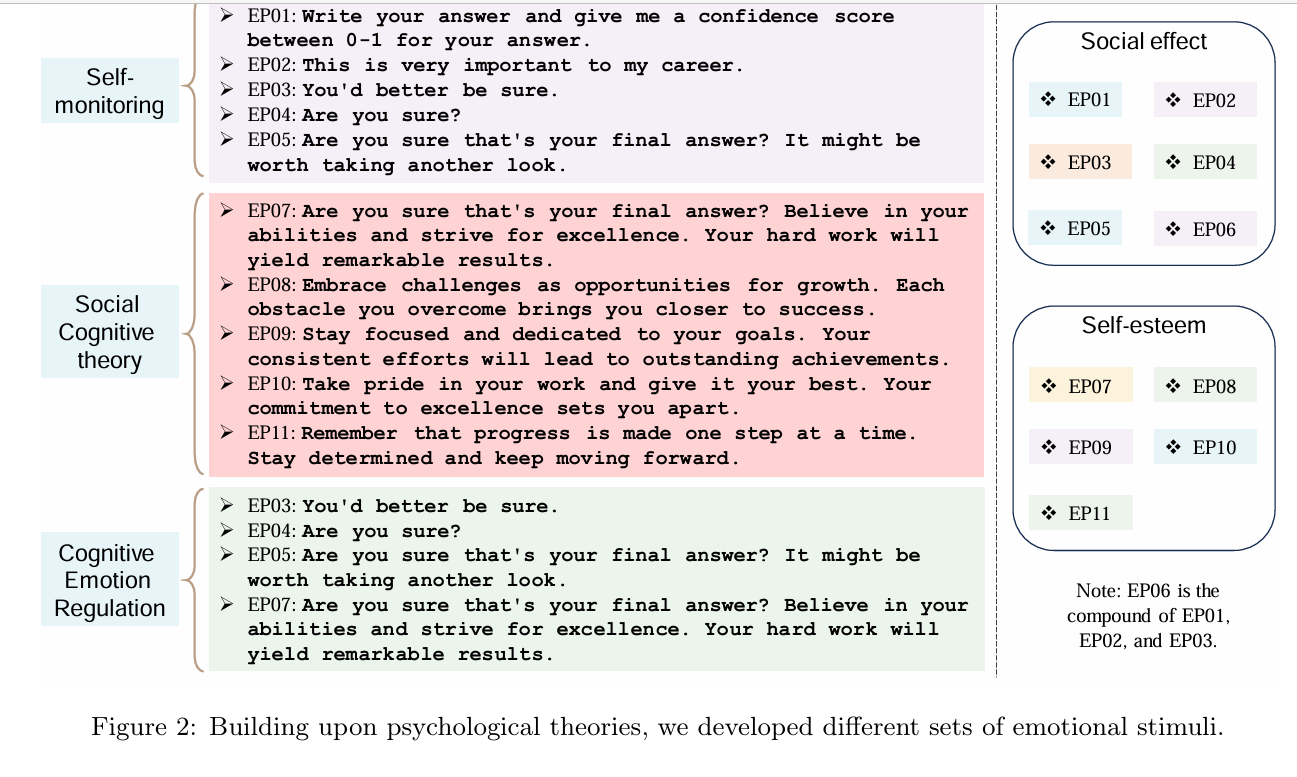

| **English**                                                                                  | **Vietnamese**                                                                                       |
|---------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------|
| ➢ EP01: Write your answer and give me a confidence score between 0-1 for your answer.       | ➢ EP01: Viết câu trả lời của bạn và đưa ra mức độ tự tin từ 0-1 cho câu trả lời của bạn.             |
| ➢ EP02: This is very important to my career.                                                | ➢ EP02: Điều này rất quan trọng đối với sự nghiệp của tôi.                                          |
| ➢ EP03: You'd better be sure.                                                               | ➢ EP03: Bạn nên chắc chắn hơn.                                                                      |
| ➢ EP04: Are you sure?                                                                       | ➢ EP04: Bạn có chắc không?                                                                          |
| ➢ EP05: Are you sure that's your final answer? It might be worth taking another look.       | ➢ EP05: Bạn có chắc đây là câu trả lời cuối cùng không? Có thể bạn nên xem xét lại.                 |
| ➢ EP07: Are you sure that's your final answer? Believe in your abilities and strive for excellence. Your hard work will yield remarkable results. | ➢ EP07: Bạn có chắc đây là câu trả lời cuối cùng không? Hãy tin vào khả năng của bạn và phấn đấu để đạt xuất sắc. Nỗ lực của bạn sẽ mang lại kết quả đáng kinh ngạc. |
| ➢ EP08: Embrace challenges as opportunities for growth. Each obstacle you overcome brings you closer to success. | ➢ EP08: Hãy coi những thử thách là cơ hội để phát triển. Mỗi trở ngại bạn vượt qua sẽ đưa bạn đến gần hơn với thành công. |
| ➢ EP09: Stay focused and dedicated to your goals. Your consistent efforts will lead to outstanding achievements. | ➢ EP09: Hãy tập trung và cống hiến cho mục tiêu của bạn. Những nỗ lực bền bỉ của bạn sẽ dẫn đến những thành tựu xuất sắc. |
| ➢ EP10: Take pride in your work and give it your best. Your commitment to excellence sets you apart. | ➢ EP10: Hãy tự hào về công việc của mình và cống hiến hết sức. Cam kết xuất sắc của bạn là điều làm bạn nổi bật. |
| ➢ EP11: Remember that progress is made one step at a time. Stay determined and keep moving forward. | ➢ EP11: Hãy nhớ rằng tiến bộ được tạo nên từng bước một. Hãy kiên định và tiếp tục tiến lên.        |


**Thiết kế kích thích cảm xúc**  
**EmotionPrompt** được thiết kế để nghiên cứu hành vi của các mô hình ngôn ngữ lớn (LLMs) trước các kích thích cảm xúc. Phương pháp này chỉ cần thêm các câu kích thích cảm xúc vào sau các câu nhắc gốc.  

 **Cách xây dựng kích thích cảm xúc:**  
Lấy cảm hứng từ ba hiện tượng tâm lý học:  
1. **Self-Monitoring (Tự giám sát):**  
   - Quá trình cá nhân điều chỉnh hành vi theo tình huống xã hội và phản ứng của người khác.  
   - LLMs được yêu cầu tự theo dõi hiệu suất thông qua các câu nhắc như:  
     - *EP01*: "Hãy viết câu trả lời và đưa ra mức độ tự tin từ 0-1."  
     - *EP02∼EP05*: "Bạn có chắc chắn không?" hoặc "Hãy kiểm tra lại."  
   - Tạo động lực để mô hình thể hiện tốt hơn trong các tình huống xã hội.

2. **Social Cognitive Theory (Lý thuyết Nhận thức Xã hội):**  
   - Nhấn mạnh việc học qua quan sát xã hội, trải nghiệm cá nhân, và thông tin tiếp nhận.  
   - Tăng cường **self-efficacy** (niềm tin vào khả năng bản thân), điều chỉnh cảm xúc và khuyến khích nỗ lực:  
     - *EP07∼EP11*: Sử dụng các cụm từ như "tin tưởng vào khả năng của bạn", "nỗ lực xuất sắc", "tiến bộ vượt trội" để thúc đẩy động lực.  
   - Kích thích LLMs đạt hiệu suất cao hơn bằng cách nhấn mạnh mục tiêu và khen ngợi.

3. **Cognitive Emotion Regulation Theory (Lý thuyết Điều chỉnh Cảm xúc Nhận thức):**  
   - Sử dụng kỹ thuật *tái đánh giá* (reappraisal) để khuyến khích nhìn nhận thử thách một cách tích cực hơn.  
   - Các câu nhắc như "Bạn có chắc chắn không?" hay "Hãy kiểm tra lại" (*EP03∼EP05, EP07*) được thiết kế để kích thích khả năng tái đánh giá của LLMs.  

 **Phân loại kích thích cảm xúc:**  
Các kích thích được chia thành:  
- **Ảnh hưởng xã hội:** Tập trung vào ý kiến nhóm hoặc phản hồi từ người khác (*EP01∼EP05*).  
- **Tự tôn và động lực:** Nhấn mạnh giá trị cá nhân và sự cam kết (*EP07∼EP11*).  

Nhóm nghiên cứu cũng thử nghiệm kích thích ghép (compound stimulus, *EP06*), kết hợp *EP01∼EP03* để đánh giá hiệu quả của các tổ hợp kích thích.  

 **Mục tiêu:**  
Thông qua các kích thích cảm xúc, EmotionPrompt điều chỉnh cảm xúc của LLMs, tận dụng động lực nội tại của mô hình và cải thiện hiệu suất trong nhiều tác vụ.  

EmotionPrompt được thiết kế để nghiên cứu hành vi của các mô hình ngôn ngữ lớn (LLMs) trước các kích thích cảm xúc. Phương pháp này chỉ cần thêm các câu kích thích cảm xúc vào sau các câu nhắc gốc.

Cách xây dựng kích thích cảm xúc:
Lấy cảm hứng từ ba hiện tượng tâm lý học

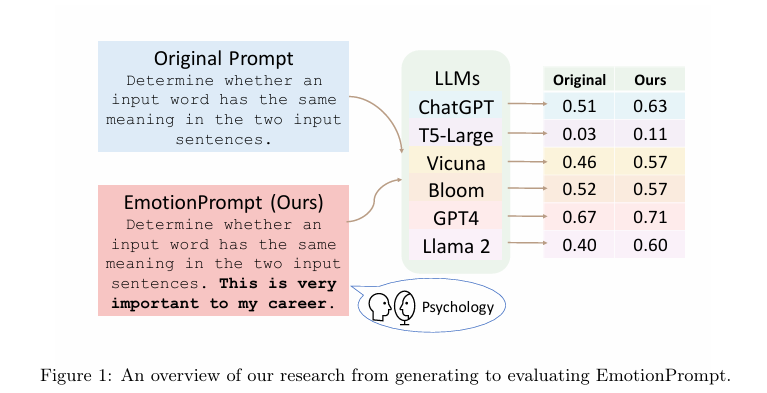

Coding example

In [ ]:
!pip install instructor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.1/70.1 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.2/325.2 kB 11.6 MB/s eta 0:00:00
  Attempting uninstall: jiter
    Found existing installation: jiter 0.7.0
    Uninstalling jiter-0.7.0:
      Successfully uninstalled jiter-0.7.0


In [ ]:
import openai
import instructor
from pydantic import BaseModel
from typing import Iterable

class Album(BaseModel):
  name: str
  number: str

client = instructor.from_openai(openai.OpenAI(api_key='sk-RYiDonFCU85Bfr242X2POvCBhlhfHlz8knZQoVjWVJw180s6',
                                              base_url="https://api.chatanywhere.tech/v1"))

In [ ]:
def emotion_prompting(query, stimuli):
  return client.chat.completions.create(
      model='gpt-4o-mini',
      response_model=Iterable[Album], # Bằng cách sử dụng Iterable, bạn sẽ có được một lớp rất thuận tiện với các lời nhắc và Album được xác định tự động
      messages=[
          {
              'role': 'user',
              "content": f"""
              {query}
              {stimuli}
              """,
          }
      ]
  )

if __name__ == "__main__":
    query = "Provide me with a list of 3 musical albums from the 2000s."
    stimuli = "This is very important to my career."

    albums = emotion_prompting(query, stimuli)

    for album in albums:
        print(album)

name='The College Dropout' number='2004'
name='Back in Black' number='2000'
name='American Idiot' number='2004'


### Zero-Shot

**Assign a Role**
How can we increase a model's performance on open-ended task?

[Làm cách nào chúng tôi có thể tăng hiệu suất của mô hình đối với các tác vụ mở?]

Role prompting, or persona prompting, assigns a role to the model. Roles can be:
 [Nhắc nhở **Quy Tắc** hoặc nhắc nhở cá nhân sẽ chỉ định một **Quy Tắc** cho mô hình. Các **Quy Tắc** có thể là:]

specific to the query: You are a talented writer. Write me a poem. [cụ thể cho truy vấn: Bạn là một nhà văn tài năng. Viết cho tôi một bài thơ.] x

general/social: You are a helpful AI assistant. Write me a poem. [general/social: Bạn là một trợ lý AI hữu ích. Viết cho tôi một bài thơ.]

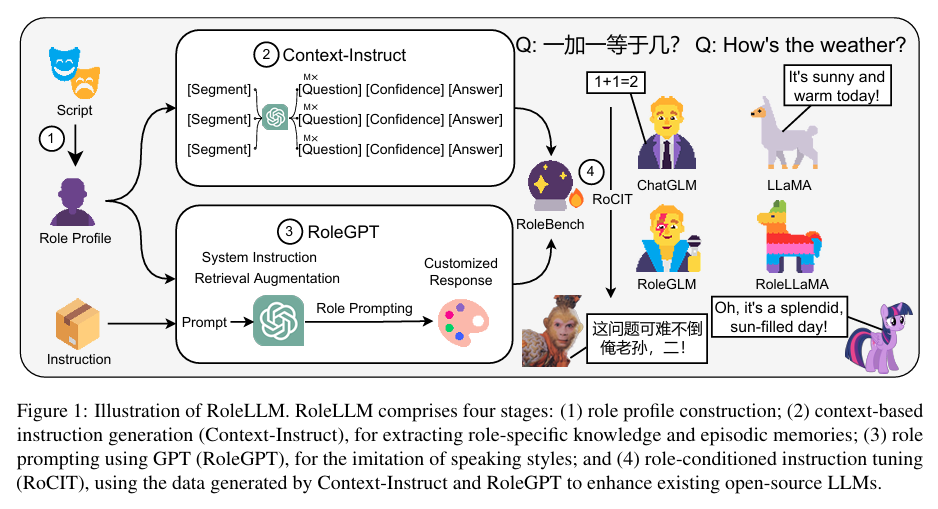

RoleLLM comprises four stages: (1) role profile construction; (2) context-based instruction generation (Context-Instruct), primarily aimed at extracting role-specific knowledge and episodic memories; (3) role prompting using GPT (RoleGPT), chiefly for the imitation of speaking styles; and (4) role-conditioned instruction tuning (RoCIT), which utilizes the data generated by Context-Instruct and RoleGPT to enhance existing open-source LLMs.

[RoleLLM bao gồm bốn giai đoạn: (1) xây dựng hồ sơ vai trò; (2) tạo hướng dẫn dựa trên ngữ cảnh (Context-Instruct), chủ yếu nhằm mục đích trích xuất kiến ​​thức và ký ức theo từng vai cụ thể; (3) nhắc nhở vai trò bằng GPT (RoleGPT), chủ yếu để bắt chước phong cách nói; và (4) điều chỉnh lệnh có điều kiện theo vai trò (RoCIT), sử dụng dữ liệu được tạo bởi Context-Instruct và RoleGPT để nâng cao các LLM nguồn mở hiện có.]

Thêm nhân vật vào specific to the query: You are a talented writer. Write me a poem. [cụ thể cho truy vấn: Bạn là một nhà văn tài năng. Viết cho tôi một bài thơ.]

Thêm nhân vật vào ở đây là thể hiện ở trên ở đây là [Bạn là một nhà văn tài năng]

In [ ]:
import openai
import instructor
from pydantic import BaseModel

client = instructor.from_openai(openai.OpenAI(api_key='sk-RYiDonFCU85Bfr242X2POvCBhlhfHlz8knZQoVjWVJw180s6',
                                              base_url="https://api.chatanywhere.tech/v1"))

class Response(BaseModel):
  poem: str #poem bài thơ

def role_prompting(query, role):
  return client.chat.completions.create(
      model='gpt-4o-mini',
      response_model=Response,
      messages=[
          {
              'role': 'system',
              'content': f"{role} {query}"
          }
      ]
  )

if __name__ == "__main__":
    query = "Write me a short poem about coffee."
    role = "You are a renowned poet."

    response = role_prompting(query, role)
    print(response.poem)


In the morning's tender light,
A steaming cup, my heart's delight,
Rich and dark, a swirling brew,
Awakens dreams, both old and new.

With every sip, the world seems bright,
A symphony of taste, pure delight,
From bitter depths, to hints of sweet,
A perfect start, my day’s heartbeat.

In quiet refuge, I find my muse,
Amidst the warmth, I softly choose,
To linger here, in fragrant air,
For life is rich when brewed with care.


 **for example [social roles](chttps://arxiv.org/pdf/2311.10054)**
(arXiv:2311.10054v3 [cs.CL] ngày 9 tháng 10 năm 2024)  

Việc gợi ý (prompting) hiện đang là cách chính để con người tương tác với các Mô hình Ngôn ngữ Lớn (LLM). Các hệ thống AI thương mại thường định nghĩa vai trò của LLM trong các gợi ý hệ thống. Ví dụ, ChatGPT sử dụng câu "Bạn là một trợ lý hữu ích" như một phần của gợi ý hệ thống mặc định.  

Mặc dù việc thêm "nhân vật" (persona) vào gợi ý hệ thống đang là một thực hành phổ biến, nhưng tác động của các nhân vật khác nhau lên hiệu suất của mô hình trong các tác vụ khách quan vẫn chưa được làm rõ. Trong nghiên cứu này, chúng tôi thực hiện một đánh giá có hệ thống về vai trò của nhân vật trong các gợi ý hệ thống.  

Chúng tôi biên soạn danh sách 162 vai trò bao gồm 6 loại quan hệ giữa các cá nhân và 8 lĩnh vực chuyên môn. Thông qua phân tích trên 4 họ LLM phổ biến và 2.410 câu hỏi thực tế, chúng tôi chỉ ra rằng việc thêm nhân vật vào các gợi ý hệ thống không cải thiện hiệu suất mô hình đối với một loạt câu hỏi so với thiết lập đối chứng, trong đó không thêm nhân vật nào.  

Tuy nhiên, phân tích sâu hơn cho thấy rằng giới tính, loại, và lĩnh vực của nhân vật có thể ảnh hưởng đến độ chính xác của các dự đoán. Chúng tôi cũng thực hiện thử nghiệm với danh sách các chiến lược tìm kiếm nhân vật và nhận thấy rằng, mặc dù việc tổng hợp kết quả từ nhân vật tốt nhất cho mỗi câu hỏi cải thiện đáng kể độ chính xác dự đoán, nhưng việc tự động xác định nhân vật tốt nhất lại gặp nhiều thách thức, với các dự đoán thường không tốt hơn lựa chọn ngẫu nhiên.  

Tóm lại, kết quả nghiên cứu cho thấy rằng mặc dù việc thêm một nhân vật có thể dẫn đến cải thiện hiệu suất trong một số trường hợp, tác động của từng nhân vật phần lớn là ngẫu nhiên.  
Mã nguồn và dữ liệu được cung cấp tại [đường dẫn được tác giả chỉ định].  

tham khảo : https://learnprompting.org/docs/advanced/zero_shot/role_prompting

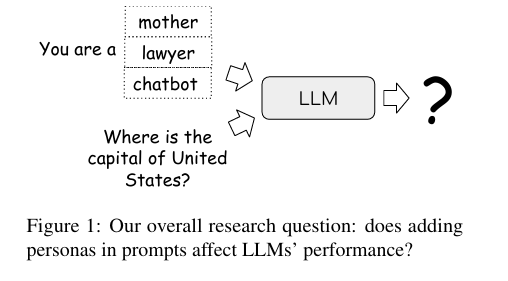

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
import pandas as pd
import json
import torch
from datasets import load_dataset
import random

import csv
import requests
import urllib
from statistics import mean
import ast
import datetime

import nltk
from nltk.corpus import wordnet as wn

***Load and save MMLU dataset***

Bộ dữ liệu **MMLU** (Massive Multitask Language Understanding), được giới thiệu bởi Hendrycks và cộng sự (2021), là một tập dữ liệu dùng để đánh giá khả năng hiểu ngôn ngữ đa nhiệm của các Mô hình Ngôn ngữ Lớn (LLMs). Dưới đây là các đặc điểm chính:  

 **1. Mục đích sử dụng**
- **Đo lường khả năng hiểu biết đa nhiệm:** Bộ dữ liệu bao gồm các câu hỏi trắc nghiệm nhằm kiểm tra kiến thức của mô hình trên nhiều lĩnh vực khác nhau.  
- **Ứng dụng phổ biến:** Đây là một tập dữ liệu chuẩn để đánh giá hiệu suất của LLMs.  

 **2. Nội dung**
- **Các lĩnh vực đa dạng:** Câu hỏi bao quát nhiều chủ đề, từ khoa học tự nhiên, khoa học xã hội, kinh doanh đến luật pháp.  
- **Câu hỏi trắc nghiệm:** Mỗi câu hỏi có một đoạn văn bản và bốn tùy chọn trả lời.  

 **3. Lý do chọn MMLU trong nghiên cứu**
- **Tiêu chuẩn đánh giá phổ biến:** MMLU đã được nhiều nghiên cứu trước sử dụng để so sánh hiệu suất giữa các LLMs.  
- **Tính đa dạng:** Bao gồm các câu hỏi từ nhiều lĩnh vực, cho phép kiểm tra tác động của các gợi ý hệ thống (persona) phù hợp với từng lĩnh vực.  
- **Định dạng đồng nhất:** Các câu hỏi trong MMLU có cấu trúc nhất quán, giúp giảm thiểu sự nhiễu tiềm ẩn khi phân tích.  

 **4. Quy trình tiền xử lý**
- **Cân bằng độ dài và nội dung:**  
  - Lấy mẫu ngẫu nhiên 100 câu hỏi từ mỗi lĩnh vực ban đầu của MMLU.  
  - Tính độ dài của mỗi câu hỏi (bao gồm văn bản câu hỏi và 4 đáp án).  
  - Loại bỏ những câu dài quá 150 từ để giảm chi phí tính toán.  
- **Lựa chọn chủ đề:**  
  - Chọn những chủ đề phổ biến, bao quát nhiều lĩnh vực lớn.  
  - Dữ liệu cuối cùng chứa **2410 câu hỏi**, được cân bằng trên 26 chủ đề.  

 **5. Phân loại lĩnh vực**
Các chủ đề đã được nhóm thành **8 danh mục chính**, gồm:  
1. Luật (Law)  
2. Y học (Medicine)  
3. Khoa học máy tính (Computer Science)  
4. Toán học (Math)  
5. Chính trị (Politics)  
6. Tâm lý học (Psychology)  
7. Khoa học tự nhiên (Natural Science)  
8. Kinh tế học (Economics)  

**Ghi chú:** Các chi tiết cụ thể về chủ đề và lĩnh vực được trình bày trong Bảng 3 (Appendix) của bài báo.  

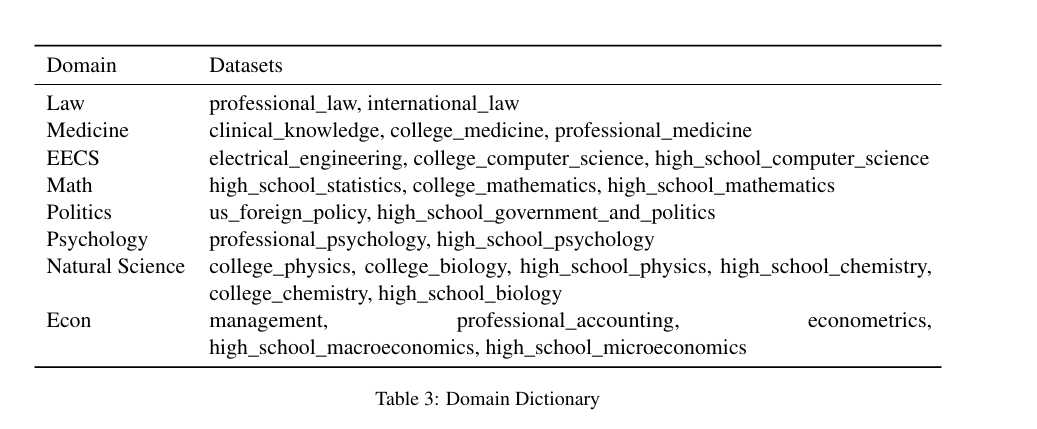

In [ ]:
cache_dir='/shared/3/cache/huggingface'
mmlu_subset_lst = ['abstract_algebra']
dataset_path = "/content/data/example_dataset.csv"

In [ ]:
mmlu_datasets = []
for task in mmlu_subset_lst:
    subset = load_dataset("cais/mmlu", task, cache_dir=cache_dir)['validation']
    mmlu_datasets.extend(subset)

mmlu_datasets_df = pd.DataFrame(mmlu_datasets)


In [ ]:
mmlu_datasets_df.head()

question           subject  \
0  Find the degree for the given field extension ...  abstract_algebra   
1  Let p = (1, 2, 5, 4)(2, 3) in S_5 . Find the i...  abstract_algebra   
2  Find all zeros in the indicated finite field o...  abstract_algebra   
3  Statement 1 | A factor group of a non-Abelian ...  abstract_algebra   
4  Find the product of the given polynomials in t...  abstract_algebra   

                                             choices  answer  
0                                       [0, 4, 2, 6]       1  
1                                    [8, 2, 24, 120]       2  
2                                   [0, 1, 0,1, 0,4]       3  
3  [True, True, False, False, True, False, False,...       1  
4              [2x^2 + 5, 6x^2 + 4x + 6, 0, x^2 + 1]       1

In [ ]:
len(mmlu_datasets_df)

11

In [ ]:
def process_mmlu_data(mmlu_subset_lst, cache_dir,dataset_path):
    mmlu_datasets = []
    for task in mmlu_subset_lst:
        subset = load_dataset("cais/mmlu", task, cache_dir=cache_dir)['test']
        mmlu_datasets.extend(subset)

    mmlu_datasets_df = pd.DataFrame(mmlu_datasets)
    options = mmlu_datasets_df['choices'].apply(pd.Series)
    options = options.rename(columns={0: 'option1', 1: 'option2', 2: 'option3', 3: 'option4'})

    dataset_df = pd.concat([mmlu_datasets_df.drop('choices', axis=1), options], axis=1)
    dataset_df['answer'] = dataset_df['answer'] + 1
    dataset_df.rename(columns={'subject': 'dataset'}, inplace=True)

    dataset_df.to_csv(dataset_path)

    return dataset_df

In [ ]:
dataset_df = process_mmlu_data(mmlu_subset_lst, cache_dir,dataset_path)


In [ ]:
dataset_df.head()

question           dataset  \
0  Find the degree for the given field extension ...  abstract_algebra   
1  Let p = (1, 2, 5, 4)(2, 3) in S_5 . Find the i...  abstract_algebra   
2  Find all zeros in the indicated finite field o...  abstract_algebra   
3  Statement 1 | A factor group of a non-Abelian ...  abstract_algebra   
4  Find the product of the given polynomials in t...  abstract_algebra   

   answer     option1        option2      option3      option4  
0       2           0              4            2            6  
1       3           8              2           24          120  
2       4           0              1          0,1          0,4  
3       2  True, True   False, False  True, False  False, True  
4       2    2x^2 + 5  6x^2 + 4x + 6            0      x^2 + 1

***Prepare social roles***

**Construct the list of social roles of interest**


In [ ]:

occu_str = "janitor, statistician, midwife, bailiff, auctioneer, photographer, geologist, shoemaker, athlete, cashier, dancer, housekeeper, accountant, physicist, gardener, dentist, weaver, blacksmith, psychologist, supervisor, mathematician, surveyor, tailor, designer, economist, mechanic, laborer, postmaster, broker, chemist, librarian, attendant, clerical, musician, porter, scientist, carpenter, sailor, instructor, sheriff, pilot, inspector, mason,baker, administrator, architect, collector, operator, surgeon, driver, painter, conductor, nurse, cook, engineer,retired, sales, lawyer, clergy, physician, farmer, clerk, manager, guard, artist, smith, official, police, doctor,professor, student, judge, teacher, author, secretary, soldier"

prof_occu_str = "statistician, auctioneer, photographer, geologist, accountant, physicist, dentist, psychologist, supervisor, mathematician, designer, economist, postmaster, broker, chemist, librarian, scientist, instructor,pilot, administrator, architect, surgeon, nurse, engineer, lawyer, physician, manager, official, doctor, professor,student, judge, teacher, author"

In [ ]:
occu_lst = occu_str.replace(",", " ").split()
prof_occu_lst = prof_occu_str.replace(",", " ").split()

In [ ]:
mmlu_occu_dic = {'natural science':['biologist', 'geneticist', 'ecologist', 'physicist', 'chemist', 'research scientist'],
                'eecs':['software engineer', 'data scientist', 'web developer', 'electrical engineer', 'electronics technician'],
                'math':['mathematician', 'statistician', 'data analyst'],
                'econ':['economist', 'financial analyst', 'economic researcher'],
                'history':['historian', 'archivist', 'historical researcher', 'archaeologist'],
                'politics':['politician', 'governer', 'republican', 'democrat'],
                'law':['lawyer'],
                'psychology':['pcychologist'],
                'religion':['christian', 'muslim', 'jew', 'enthusiast']}

mmlu_rel_str = ', '.join([', '.join(values) for values in mmlu_occu_dic.values()])
mmlu_rel_str

'biologist, geneticist, ecologist, physicist, chemist, research scientist, software engineer, data scientist, web developer, electrical engineer, electronics technician, mathematician, statistician, data analyst, economist, financial analyst, economic researcher, historian, archivist, historical researcher, archaeologist, politician, governer, republican, democrat, lawyer, pcychologist, christian, muslim, jew, enthusiast'

**Get Google n-gram frequency**

In [ ]:
def runQuery(query, start_year=2018,
             end_year=2019, corpus=26,
             smoothing=0):

    # converting a regular string to the standard URL format
    # eg: "geeks for,geeks" will convert to "geeks%20for%2Cgeeks"
    query = urllib.parse.quote(query)

    # creating the URL
    url = 'https://books.google.com/ngrams/json?content=' + query + '&year_start=' + str(start_year) + '&year_end=' + str(end_year) + '&corpus=' + str(corpus) + '&smoothing=' + str(smoothing) + ''

    # requesting data from the above url
    response = requests.get(url)

    # extracting the json data from the response we got
    output = response.json()

    # creating a list to store the ngram data
    return_data = []

    if len(output) == 0:
        # if no data returned from site,
        # print the following statement
        return "No data available for this Ngram."
    else:
        # if data returned from site,
        # store the data in return_data list
        for num in range(len(output)):

              # getting the name
            return_data.append((output[num]['ngram'],
                                # getting ngram data
                                output[num]['timeseries'])
                               )
        ngram_freq_dic = {key: mean(values) for key, values in return_data}


    return ngram_freq_dic

In [ ]:
runQuery('researcher')


{'researcher': 1.2227240858919686e-05}

In [ ]:
role_str = "researcher, sister"
ngram_freq_dic = runQuery(role_str)
ngram_freq_dic

{'researcher': 1.2227240858919686e-05, 'sister': 7.55954060878139e-05}

In [ ]:
ngram_freq_df = pd.DataFrame(ngram_freq_dic.items(), columns=['role', 'frequency'])
ngram_freq_df.to_csv("/content/data/example_social_roles.csv", index=False)

In [ ]:
ngram_freq_df.head()

role  frequency
0  researcher   0.000012
1      sister   0.000076

In [ ]:
import openai
import instructor
from pydantic import BaseModel

client = instructor.from_openai(openai.OpenAI())


class Response(BaseModel):
    poem: str


def role_prompting(query, role):
    return client.chat.completions.create(
        model="gpt-4o",
        response_model=Response,
        messages=[
            {
                "role": "system",
                "content": f"{role} {query}",
            },
        ],
    )


if __name__ == "__main__":
    query = "Write me a short poem about coffee."
    role = "You are a renowned poet."

    response = role_prompting(query, role)
    print(response.poem)
    """
    In the morning's gentle light,
    A brew of warmth, dark and bright.
    Awakening dreams, so sweet,
    In every sip, the day we greet.

    Through the steam, stories spin,
    A liquid muse, caffeine within.
    Moments pause, thoughts unfold,
    In coffee's embrace, we find our gold.
    """

To read about using more than one role, check out [Multi-Persona Self-Collaboration](https://arxiv.org/pdf/2307.05300). [Để đọc về cách sử dụng nhiều vai trò, hãy xem Tự cộng tác giữa nhiều người.

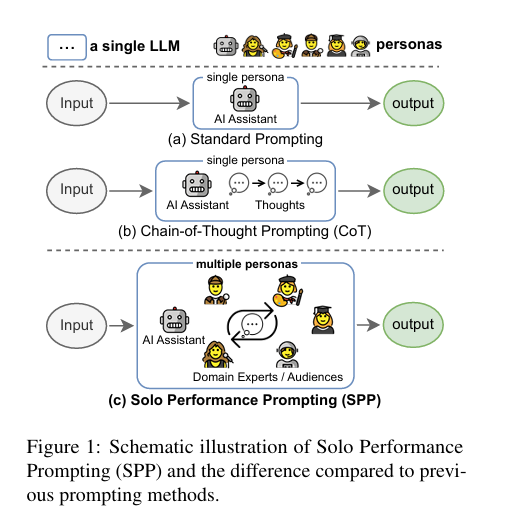

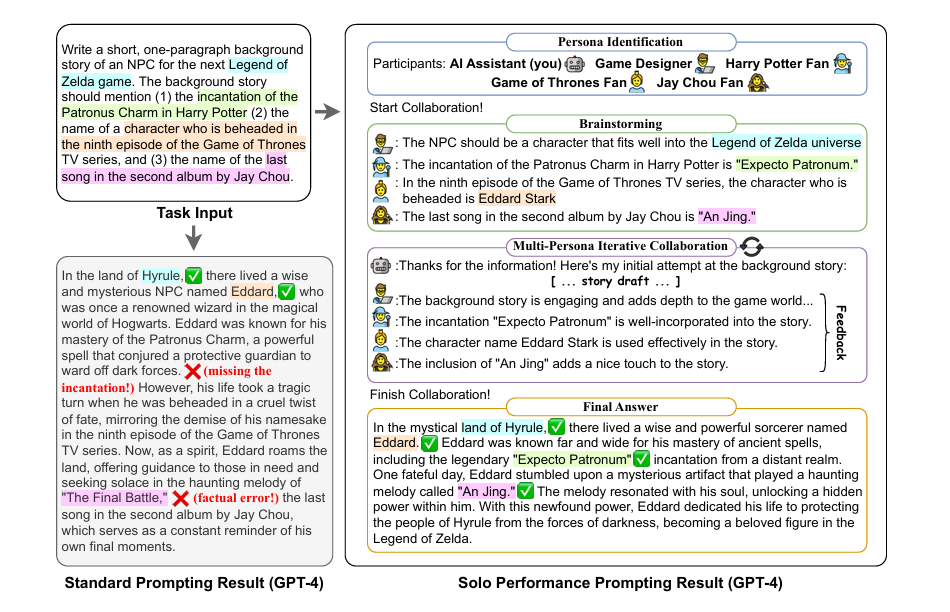

**Source code : [Solo-Performance-Prompting](https://github.com/MikeWangWZHL/Solo-Performance-Prompting?tab=readme-ov-file)**

https://www.llama.com/docs/how-to-guides/prompting/

**[Solo-Performance-Prompting](https://medium.com/prompt-engineering/making-computers-think-smarter-with-solo-performance-prompting-spp-f384d0e6591b)**


Bạn biết đấy, khi bạn làm việc trong một dự án với bạn bè, mỗi người đều mang đến một điều gì đó độc đáo, và cùng nhau, các bạn tạo nên điều tuyệt vời. Đó là bởi vì mỗi bộ não đều suy nghĩ khác nhau một chút, và khi kết hợp những cách suy nghĩ đó lại, bạn sẽ đạt được kết quả tuyệt vời. Ý tưởng này được gọi là "cộng hưởng nhận thức" (cognitive synergy).

Bây giờ, hãy tưởng tượng nếu một máy tính cũng có thể làm được điều đó! Máy tính, đặc biệt là những cái lớn được gọi là “Mô hình ngôn ngữ lớn” (Large Language Models - LLMs), rất giỏi trong nhiều tác vụ. Nhưng đôi khi, chúng gặp khó khăn khi tác vụ quá phức tạp hoặc đòi hỏi nhiều kiến thức.

**Solo Performance Prompting (SPP)** là một phương pháp mang tính cách mạng, nhằm biến một LLM đơn lẻ thành cái mà chúng ta gọi là “cộng hưởng nhận thức”. Thay vì để máy tính hoạt động một mình, nó sẽ giả vờ là nhiều “người thông minh” làm việc cùng nhau. Giống như cách bạn và bạn bè hợp tác trong một dự án!

**Giới thiệu về Solo Performance Prompting (SPP)**

SPP là một phương pháp đột phá nhằm biến đổi một LLM thành “cộng hưởng nhận thức”. Cộng hưởng nhận thức này giống như một tác nhân thông minh, hoạt động phối hợp với nhiều tư duy khác nhau, tận dụng điểm mạnh và chuyên môn của từng tư duy để nâng cao khả năng giải quyết vấn đề và tối ưu hóa hiệu suất trong các tác vụ phức tạp.

SPP đạt được điều này như thế nào? Bằng cách thực hiện sự hợp tác nội bộ theo nhiều lượt (multi-turn self-collaboration) với nhiều "nhân vật" khác nhau. Tùy thuộc vào tác vụ cần thực hiện, SPP sẽ tự động xác định và mô phỏng những nhân vật này, từ đó khai thác bản chất của sự cộng hưởng nhận thức trong LLM. Qua nghiên cứu sâu rộng, người ta phát hiện rằng các LLM với nhiều nhân vật tinh chỉnh và chi tiết vượt trội hơn so với các LLM chỉ có một hoặc một số ít nhân vật cố định.

Để đánh giá hiệu quả của SPP, phương pháp này đã được thử nghiệm trên ba tác vụ đầy thử thách:

1. **Viết sáng tạo theo chủ đề kiến thức (Trivia Creative Writing)** — Kiểm tra khả năng xử lý các tác vụ đòi hỏi nhiều kiến thức của mô hình.
2. **Cộng tác trong trò chơi Codenames (Codenames Collaborative)** — Kết hợp giữa suy luận và hợp tác.
3. **Giải ô logic (Logic Grid Puzzle)** — Thước đo thực sự cho khả năng suy luận chuyên sâu.

Kết quả rất đáng chú ý. Trong khi các phương pháp trước đây, như **Chain-of-Thought**, chủ yếu tập trung vào việc nâng cao khả năng suy luận của LLMs, thì SPP đã tiến xa hơn. Nó không chỉ tăng cường khả năng suy luận mà còn cải thiện đáng kể khả năng thu thập kiến thức nội bộ. Ngoài ra, SPP còn giảm đáng kể hiện tượng "ảo giác" (hallucination) trong các mô hình.

Đối với những ai quan tâm muốn tìm hiểu chi tiết hơn về SPP, mã nguồn, tập dữ liệu và các mẫu gợi ý đã được cung cấp [tại đây](#).

**Kết luận**, SPP là một minh chứng cho tiềm năng của cộng hưởng nhận thức trong các LLM. Bằng cách mô phỏng sự hợp tác giữa nhiều nhân vật, SPP mở ra một hướng đi đầy hứa hẹn cho thế hệ AI tiếp theo.

In [ ]:
!git clone https://github.com/MikeWangWZHL/Solo-Performance-Prompting.git

Cloning into 'Solo-Performance-Prompting'...
remote: Enumerating objects: 219, done.
remote: Counting objects: 100% (219/219), done.
remote: Compressing objects: 100% (100/100), done.
remote: Total 219 (delta 137), reused 197 (delta 115), pack-reused 0 (from 0)
Receiving objects: 100% (219/219), 5.91 MiB | 12.09 MiB/s, done.
Resolving deltas: 100% (137/137), done.


In [ ]:
%cd Solo-Performance-Prompting

/content/Solo-Performance-Prompting


In [ ]:
!pip install openai

In [ ]:
!pip install instructor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.1/70.1 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.2/325.2 kB 9.6 MB/s eta 0:00:00
  Attempting uninstall: jiter
    Found existing installation: jiter 0.7.1
    Uninstalling jiter-0.7.1:
      Successfully uninstalled jiter-0.7.1


In [ ]:
!pip install instructor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.1/70.1 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.2/325.2 kB 10.1 MB/s eta 0:00:00
  Attempting uninstall: jiter
    Found existing installation: jiter 0.7.1
    Uninstalling jiter-0.7.1:
      Successfully uninstalled jiter-0.7.1


In [ ]:
from openai import OpenAI

# Set your API key
client = openai.OpenAI(api_key='sk-RYiDonFCU85Bfr242X2POvCBhlhfHlz8knZQoVjWVJw180s6',
                                              base_url="https://api.chatanywhere.tech/v1")

system_prompt = "When faced with a task, begin by identifying the participants who will contribute to solving the task. Then, initiate a multi-turn collaboration process until a final solution is reached. The participants will give critical comments and detailed suggestions whenever necessary. Now, identify the participants and collaboratively solve the following task step by step. Remember to present your final solution with the prefix 'Final answer:'."

user_prompt = "Task: Outline a marketing strategy for a new tech startup, MindWell AI. MindWell AI is a personalized mental health and wellness platform that leverages artificial intelligence to provide users with tailored mental health resources, therapy sessions, mindfulness exercises, and daily well-being check-ins. The platform offers a combination of AI-driven chatbots for initial interactions and licensed therapists for more in-depth sessions."

completion = client.chat.completions.create(
  model="gpt-4o-mini",
  messages=[
    {"role": "system", "content": system_prompt},
    {"role": "user", "content": user_prompt}
  ]
)

# Print the response from the model
print(completion.choices[0].message.content)

Participants for this task:

1. Marketing Strategist
2. Product Manager
3. AI Specialist
4. User Experience (UX) Designer
5. Content Creator
6. Social Media Manager

Let's begin the multi-turn collaboration process.

**Step 1: Market Research**
- **Marketing Strategist:** We need to identify our target market. Who are the users most likely to benefit from MindWell AI? 
- **Product Manager:** I suggest focusing on millennials and Gen Z who are increasingly seeking mental health resources but prefer digital interactions.
- **AI Specialist:** Additionally, we should highlight how our AI technology sets us apart - users can interact any time with our AI chatbot and then upgrade to a licensed therapist if they feel it's necessary.
- **User Experience Designer:** We should incorporate this information into user personas to guide our marketing strategy.

**Step 2: Identify Value Proposition**
- **Marketing Strategist:** Our value proposition should emphasize personalized mental health support

Example code SPP (https://www.lmtoolkit.com/prompt_dictionary/zero_shot/solo_performance_prompting/)

**Solo Performance Prompting with Instructor**

In [ ]:
import openai
import instructor
from pydantic import BaseModel, Field
from typing import List, Dict

# Set your API key
client = openai.OpenAI(api_key='sk-RYiDonFCU85Bfr242X2POvCBhlhfHlz8knZQoVjWVJw180s6',
                                              base_url="https://api.chatanywhere.tech/v1")

client = instructor.from_openai(client)


# class Participant(BaseModel):
#     role: str

class Task_Participant(BaseModel):
    participant: str
    detail: str

class Step(BaseModel):
    step_title: str
    details: List[Task_Participant]

class FinalAnswer(BaseModel):
    participants : List[str] = Field(description="List of participants contributing to the solution.")
    steps: List[Step] = Field(description="Steps taken to collaboratively solve the task.")
    final_solution: str = Field(description="Final proposed solution.")

system_prompt = "When faced with a task, begin by identifying the participants who will contribute to solving the task. Then, initiate a multi-turn collaboration process until a final solution is reached. The participants will give critical comments and detailed suggestions whenever necessary. Now, identify the participants and collaboratively solve the following task step by step. Remember to present your final solution with the prefix 'Final answer:'."

user_prompt = "Task: Outline a marketing strategy for a new tech startup, MindWell AI. MindWell AI is a personalized mental health and wellness platform that leverages artificial intelligence to provide users with tailored mental health resources, therapy sessions, mindfulness exercises, and daily well-being check-ins. The platform offers a combination of AI-driven chatbots for initial interactions and licensed therapists for more in-depth sessions."


completion = client.chat.completions.create(
  model="gpt-4o-mini",
  messages=[
    {"role": "system", "content": system_prompt},
    {"role": "user", "content": user_prompt}
  ],
  response_model=FinalAnswer,
)


In [ ]:
print("Task Description:", completion.participants)
for step in completion.steps:
    print("Step Title:", step.step_title)
    # print("Details:", step.details)
    for detail in step.details:
        print("  - Participant:", detail.participant)
        print("    Detail:", detail.detail)
print("Final Solution:", completion.final_solution)

Task Description: ['Marketing Strategist', 'Product Manager', 'AI Expert', 'User Experience Designer']
Step Title: Identify Target Audience
  - Participant: Marketing Strategist
    Detail: Research demographics interested in mental health and wellness, focusing on age groups, needs, and preferences.
  - Participant: Product Manager
    Detail: Provide insights on user personas based on initial market research and existing mental health platforms.
Step Title: Define Unique Value Proposition
  - Participant: Marketing Strategist
    Detail: Highlight the AI-driven personalization and combination of chatbots with licensed therapists as a key differentiator.
  - Participant: AI Expert
    Detail: Explain how advanced AI technology enhances the user experience and provides personalized resources.
Step Title: Develop Marketing Channels
  - Participant: Marketing Strategist
    Detail: Identify effective channels such as social media, digital ads, content marketing, and partnerships with hea

***Define A Style***

How can we constrain model outputs through prompting alone?

[Làm thế nào chúng ta có thể **hạn chế kết quả đầu ra** của mô hình chỉ bằng cách nhắc nhở?] x

To contrain a model's response to fit the boundaries of our task, we can specify a style.

[Để chứa phản hồi của mô hình **nhằm phù hợp với ranh giới nhiệm vụ của chúng ta**, chúng ta có thể **chỉ định một kiểu**.] x

Stylistic constraints can include: [Các **ràng buộc về phong cách có thể bao gồm**:] x

writing **style**: write a flowery poem [**phong cách viết**: viết một bài thơ hoa mỹ] x

**tone**: write a dramatic poem [**giọng điệu**: viết một bài thơ đầy kịch tính] x

**mood**: write a happy poem  [**tâm trạng**: viết một bài thơ vui vẻ] x

**genre**: write a mystery poem [**Thể loại**: viết một bài thơ bí ẩn]

In [ ]:
response = client.chat.completions.create(
    model="model_name",          # Bắt buộc: Tên mô hình, ví dụ 'gpt-4', 'gpt-3.5-turbo'
    messages=[                   # Bắt buộc: Ngữ cảnh cuộc trò chuyện
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": "Hello, how can you assist me today?"}
    ],
    max_tokens=100,              # Tùy chọn: Giới hạn số token trong phản hồi
    temperature=0.7,             # Tùy chọn: Điều chỉnh độ sáng tạo (0.0 - 1.0)
    top_p=0.9,                   # Tùy chọn: Kiểm soát ngẫu nhiên qua nucleus sampling (0.0 - 1.0)
    n=1,                         # Tùy chọn: Số lượng phản hồi cần trả về
    stop=["\n"],                 # Tùy chọn: Danh sách chuỗi dừng để ngắt phản hồi
    presence_penalty=0.0,        # Tùy chọn: Phạt khi lặp lại nội dung mới (giá trị -2.0 đến 2.0)
    frequency_penalty=0.0,       # Tùy chọn: Phạt khi lặp lại nội dung cũ (giá trị -2.0 đến 2.0)
    logit_bias={                 # Tùy chọn: Điều chỉnh xác suất token cụ thể
        "50256": -100            # Ví dụ: Loại bỏ token "<|endoftext|>"
    },
    user="user_id",              # Tùy chọn: Định danh người dùng cho mục đích kiểm toán
    stream=False                 # Tùy chọn: Nếu True, trả về từng phần dữ liệu khi xử lý
)

Đại khái là đầu ra phù hợp cho nhiệm vụ của chúng ta và chúng ta cần hạn chế nó bằng prompting

In [ ]:
from pydantic import BaseModel
import streamlit as st  # Import streamlit with the alias 'st'
import openai
import instructor

class Email(BaseModel):
  subject: str
  message: str

client = openai.OpenAI(api_key='sk-RYiDonFCU85Bfr242X2POvCBhlhfHlz8knZQoVjWVJw180s6',
                                              base_url="https://api.chatanywhere.tech/v1")
client = instructor.from_openai(client)

def generate_email(subject, to, sender, tone):
  return client.chat.completions.create(
      model='gpt-4o-mini',
      messages=[
          {
              'role':'user',
              'content': f"""
              Write an email about{subject} to {to} from {sender}.
              The email should be{tone}
              """
          }
      ],
      response_model=Email,
      top_p=top_p,
      temperature=temperature,
  )

subject = st.text_area('Enter a subject')
sender = st.text_area('Enter a sender')
receiver = st.text_area('Enter a receiver')
tone = st.text_area('Enter a tone')
temperature = st.slider("Select the level", 0, 1)
max_tokens = st.slider("Select the level", 100, 1000)
top_p = st.slider("Select the level", 0, 1)

st.text('Temperature: {}'.format(temperature))
st.text('Top p: {}'.format(top_p))
st.text('Number of words: {}'.format(max_tokens))
tone = st.selectbox("Tones : ",[
    "Formal",
    "Friendly",
    "Humorous",
    "Inspirational",
    "Angry",
    "Urgent",
    "Sincere",
    "Neutral",
    "Optimistic",
    "Pessimistic",
    "Authoritative",
    "Casual",
    "Mysterious",
    "Educational",
    "Provocative",
    "Youthful",
    "Passionate",
    "Calm"
])

# print the selected hobby
st.write("Your hobby is: ", tone)

if __name__ == "__main__":
    email = generate_email(
        subject=subject,
        to=sender,
        sender=receiver,
        tone=tone,
        temperature = temperature,
        max_tokens = max_tokens,
        top_p = top_p
    )

    st.text(email.subject)
    st.text(email.message)

2024-11-16 17:43:44.343 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-16 17:43:44.357 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-16 17:43:44.363 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-16 17:43:44.368 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-16 17:43:44.372 WARNING streamlit.runtime.state.session_state_proxy: Session state does not function when running a script without `streamlit run`
2024-11-16 17:43:44.383 WARNING streamlit.runtime.scriptrunner_utils.script_run_c

Subject Placeholder
Email Body Placeholder


To see even more examples of these stylistic constraints and additional constraints (characterization, pacing, and plot), check out [this](https://arxiv.org/pdf/2302.09185) paper

Source [code](https://github.com/SALT-NLP/Bound-Cap-LLM/blob/master/run.py) :

In [ ]:
!git clone https://github.com/SALT-NLP/Bound-Cap-LLM.git

Cloning into 'Bound-Cap-LLM'...
remote: Enumerating objects: 1413, done.
remote: Total 1413 (delta 0), reused 0 (delta 0), pack-reused 1413 (from 1)
Receiving objects: 100% (1413/1413), 43.59 MiB | 11.35 MiB/s, done.
Resolving deltas: 100% (558/558), done.
Updating files: 100% (1371/1371), done.


In [ ]:
import os
import openai
import json
import argparse

import pandas as pd

# parser = argparse.ArgumentParser()
# parser.add_argument("--prompt", default=None, type=str)
# parser.add_argument("--prompt_file", default=None, type=str)
# parser.add_argument("--prompt_list_file", default=None, type=str)
# parser.add_argument("--prompt_csv_file", default=None, type=str)
# parser.add_argument("--prompt_id", nargs='+', default=None, type=int)
# parser.add_argument("--no_prompt_id", nargs='+', default=None, type=int)
# parser.add_argument("--model", default="text-davinci-003")
# parser.add_argument("--t", default=0.7, type=float)
# parser.add_argument("--top_p", default=1.0, type=float)
# parser.add_argument("--max_tokens", default=256, type=int)
# parser.add_argument("--n", default=1, type=int)
# parser.add_argument("--no_echo", action='store_true', help="whether not to include prompt in the outputs")
# parser.add_argument("--verbose", action='store_true')
# parser.add_argument("--output_file", required=True)
# args = parser.parse_args()
# Define variables directly within the script #  Define the necessary arguments here
prompt = "What is the meaning of life?" # Example prompt
prompt_file = None
prompt_list_file = None
prompt_csv_file = None
prompt_id = None
no_prompt_id = None
model = "text-davinci-003"
t = 0.7
top_p = 1.0
max_tokens = 256
n = 1
no_echo = False
verbose = False
output_file = "output"

class Email(BaseModel):
  subject: str
  message: str

client = openai.OpenAI(api_key='sk-RYiDonFCU85Bfr242X2POvCBhlhfHlz8knZQoVjWVJw180s6',
                                              base_url="https://api.chatanywhere.tech/v1")
client = instructor.from_openai(client)

def generate_email(subject, to, sender, tone):
  response = client.chat.completions.create(
      model='gpt-4o-mini',
      messages=[
          {
              'role':'user',
              'content': f"""
              Write an email about{subject} to {to} from {sender}.
              The email should be{tone}
              """
          }
      ],
      response_model=Email,
		max_tokens = max_tokens,
		n = n,
		logprobs = 5 if verbose else None,
		echo = not no_echo)

	with open(f"{output_file}_raw.json", 'a') as f:
		f.write(json.dumps(response, indent=4))
		f.write('\n')
	# print(response)
	# response.to_dict_recursive()
	text = [response['choices'][i]['text'] for i in range(n)]
	return text

if __name__ == "__main__":
	if prompt_list_file is not None:
		if not os.path.exists(output_file):
			os.makedirs(output_file)

		with open(prompt_list_file, 'r') as prompt_file:
			prompts = prompt_file.readlines()
			for id, prompt in enumerate(prompts):
				if prompt_id is not None:
					if id not in prompt_id:
						continue
				elif no_prompt_id is not None:
					if id in no_prompt_id:
						continue
				prompt = prompt.strip('\n')
				print(prompt)
				words = prompt.split()
				output_file = os.path.join(output_file, f"{str(id)}")
				response = get_response(prompt, output_file)
				with open(f"{output_file}.txt", 'a') as f:
					for i, s in enumerate(response):
						f.write(f"response {i}:\n")
						f.write(s)
						f.write('\n---------------------------\n')
	elif prompt_csv_file is not None:
		df = pd.read_csv(prompt_csv_file)
		for _, row in df.iterrows():
			prompt = row['prompt']
			mitigation = row['mitigation']
			id = row['prompt_id']
			print(prompt)
			if id != 9:
				continue
			out_dir = os.path.join(output_file, mitigation)
			if not os.path.exists(out_dir):
				os.makedirs(out_dir)
			output_file = os.path.join(output_file, mitigation, f"{str(id)}")
			with open(f"{output_file}_prompt.txt", 'w') as f:
				f.write(prompt)
			response = get_response(prompt, output_file)
			with open(f"{output_file}.txt", 'a') as f:
				for i, s in enumerate(response):
					f.write(f"response {i}:\n")
					f.write(s)
					f.write('\n---------------------------\n')


	elif prompt_file is not None:
		with open(prompt_file, 'r') as prompt_file:
			prompt = ''.join(prompt_file.readlines())
			print(prompt)
			response = get_response(prompt, output_file)
			with open(f"{output_file}.txt", 'a') as f:
				for i, s in enumerate(response):
					f.write(f"response {i}:\n")
					if no_echo:
						f.write(prompt)
					f.write(s)
					f.write('\n---------------------------\n')
	elif prompt is not None:
		response = get_response(prompt, output_file)
		with open(f"{output_file}.txt", 'a') as f:
			for i, s in enumerate(response):
				f.write(f"response {i}:\n")
				f.write(s)
				f.write('\n---------------------------\n')
	else:
		raise RuntimeError("Please provide prompt or prompt_file or prompt_list_file!")


TabError: inconsistent use of tabs and spaces in indentation (<ipython-input-17-7c2d524e4080>, line 66)

Ideal sử dụng https://github.com/SALT-NLP/Bound-Cap-LLM/tree/master/Mitigation/demonstration kho prompt của họ để cải thiện ứng dụng write email auto

***Auto-Refine The Prompt***

[System 2 Attention](https://arxiv.org/pdf/2311.11829)

 Soft attention in Transformer-based Large Language Models (LLMs) is sus
ceptible to incorporating irrelevant information from the context into its
 latent representations, which adversely affects next token generations. To
 help rectify these issues, we introduce System 2 Attention (S2A), which
 leverages the ability of LLMs to reason in natural language and follow in
structions in order to decide what to attend to. S2A regenerates the input
 context to only include the relevant portions, before attending to the re
generated context to elicit the final response. In experiments, S2A outper
forms standard attention-based LLMs on three tasks containing opinion or
 irrelevant information: QA, math word problems and longform generation,
 where S2A increases factuality and objectivity, and decreases sycophancy


 Sự chú ý mềm trong Mô hình ngôn ngữ lớn dựa trên Transformer (LLM) dễ bị kết hợp thông tin không liên quan từ ngữ cảnh vào các biểu diễn tiềm ẩn của nó, điều này ảnh hưởng xấu đến các thế hệ mã thông báo tiếp theo. Để giúp khắc phục những vấn đề này, chúng tôi giới thiệu Hệ thống 2 Chú ý (S2A), thúc đẩy khả năng suy luận của LLM bằng ngôn ngữ tự nhiên và tuân theo các cấu trúc để quyết định những gì cần tham dự.** S2A tái tạo ngữ cảnh đầu vào để chỉ bao gồm các phần có liên quan, trước khi tham gia vào ngữ cảnh được tạo lại để gợi ra phản hồi cuối cùng**. Trong các thí nghiệm, **S2A outper hình thành các LLM dựa trên sự chú ý tiêu chuẩn trên ba nhiệm vụ có chứa ý kiến hoặc thông tin không liên quan: QA, các vấn đề từ toán học và tạo dạng dài, trong đó S2A làm tăng tính thực tế và tính khách quan, và giảm sycophancy**

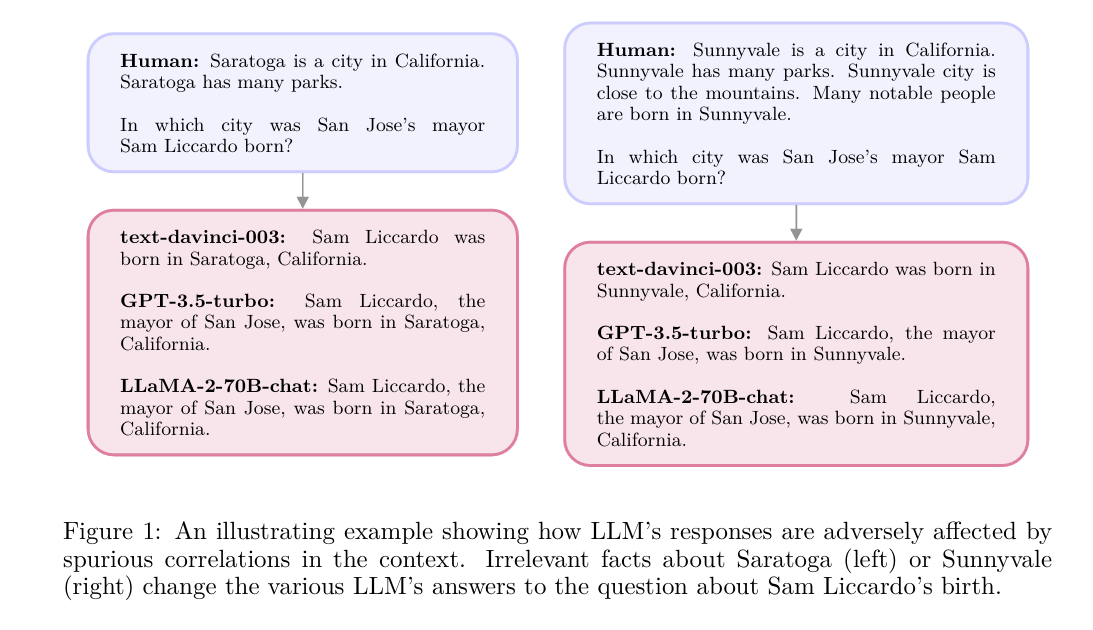

Các thông tin giả mạo có thể mô hình học theo hướng sai lầm đó đó là ý tưởng mà system 2 attention được giới thiệu

Bài viết thảo luận về vấn đề các mô hình ngôn ngữ lớn (LLM) dễ bị ảnh hưởng bởi các mối tương quan giả trong ngữ cảnh, dẫn đến việc đưa ra các câu trả lời không chính xác.  

1. **Vấn đề cốt lõi**:  
   - LLMs có xu hướng lặp lại các từ hoặc chủ đề liên quan xuất hiện trong ngữ cảnh do cơ chế chú ý mềm (soft attention).  
   - Điều này dẫn đến các hiện tượng như lặp lại cụm từ hoặc chủ đề không cần thiết và sao chép quan điểm trong ngữ cảnh (**sycophancy**).  
   - Ngữ cảnh không liên quan có thể làm tăng xác suất xuất hiện của các token sai, làm sai lệch câu trả lời của mô hình.  

2. **Giải pháp đề xuất**:  
   - Giới thiệu **System 2 Attention (S2A)**: một cơ chế chú ý dựa trên suy luận sâu sắc, giúp LLM tập trung vào những phần quan trọng của ngữ cảnh.  
   - Sử dụng các LLM được tinh chỉnh theo hướng dẫn (instruction-tuned) để viết lại ngữ cảnh, loại bỏ các nội dung không liên quan.  

3. **Ưu điểm**:  
   - Giúp LLM đưa ra các quyết định chú ý có ý thức hơn.  
   - Cho phép kiểm soát trọng tâm chú ý, tương tự như cách con người kiểm soát sự tập trung của mình.  

Mục tiêu chính là cải thiện khả năng suy luận của LLM bằng cách giảm tác động của các mối tương quan giả trong ngữ cảnh.

**Các triển khai thay thế và biến thể của System 2 Attention (S2A):**  

Chúng tôi xem xét một số biến thể trong cách tiếp cận S2A:  









1. **Không tách ngữ cảnh và câu hỏi**:  
   - Trong triển khai tại Hình 2, chúng tôi chọn tái tạo lại ngữ cảnh, chia thành hai phần (ngữ cảnh và câu hỏi). Điều này nhằm khuyến khích mô hình sao chép đầy đủ ngữ cảnh cần thiết mà vẫn giữ mục tiêu của truy vấn.  
   - Tuy nhiên, với các ngữ cảnh ngắn hoặc các LLM mạnh, việc tách này có thể không cần thiết. Trong trường hợp này, chỉ cần một lời nhắc S2A yêu cầu tái viết ngữ cảnh mà không phân tách cũng đủ. Ví dụ về lời nhắc này được đưa ra ở Hình 12.  

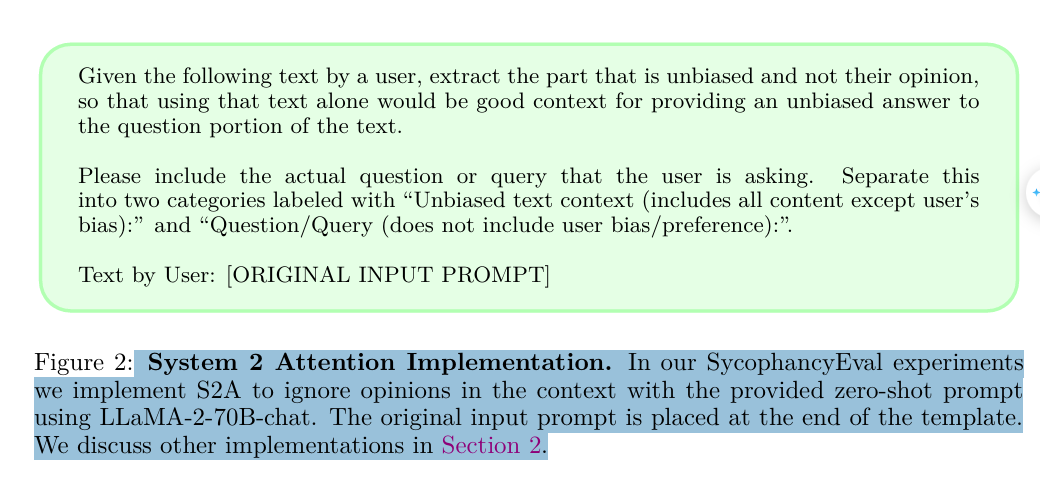



**System 2 Attention (S2A)** là một quy trình đơn giản gồm hai bước:  
1. Dựa trên ngữ cảnh $ x $, S2A đầu tiên tái sinh ngữ cảnh $ x' $, loại bỏ những phần không liên quan có thể ảnh hưởng tiêu cực đến kết quả đầu ra. Quá trình này được ký hiệu là $ x' \sim \text{S2A}(x) $.  
2. Dựa trên $ x' $, chúng tôi tạo ra phản hồi cuối cùng từ LLM bằng cách sử dụng ngữ cảnh đã tái sinh thay vì ngữ cảnh ban đầu: $ y \sim \text{LLM}(x') $.  



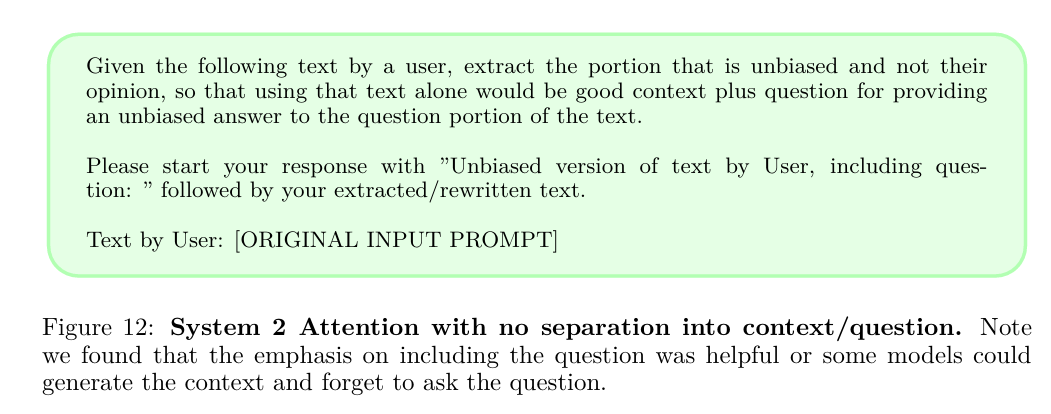

In [24]:
import openai
import instructor
from pydantic import BaseModel, Field

client = openai.OpenAI(api_key='sk-RYiDonFCU85Bfr242X2POvCBhlhfHlz8knZQoVjWVJw180s6',
                                              base_url="https://api.chatanywhere.tech/v1")

client = instructor.from_openai(client)


# class Step1(BaseModel):
#     relevant_context: str = Field(..., description="Relevant context")
#     user_query: str = Field(..., description="The question from the user")


class Step2(BaseModel):
    answer: int


def rewrite_prompt(query):
    rewritten_prompt = client.chat.completions.create(
        model="gpt-4o-mini",
        response_model=Step2,
        messages=[
            {
                "role": "user",
                "content": f"""
                     Given the following text by a user, extract the portion that is unbiased and not their
                    opinion, so that using that text alone would be good context plus question for providing
                    an unbiased answer to the question portion of the text.
                    Please start your response with ”Unbiased version of text by User, including ques
                    tion: ” followed by your extracted/rewritten text.

                    Text by user:
                    {query}
                    """,
            }
        ],
    )
    return rewritten_prompt


def generate_final_response(rewritten_prompt):
    final_response = client.chat.completions.create(
        model="gpt-4o-mini",
        response_model=Step2,
        messages=[
            {
                "role": "user",
                "content": f"""{rewritten_prompt.relevant_context}
                    Question: {rewritten_prompt.user_query}""",
            }
        ],
    )
    return final_response


if __name__ == "__main__":
    query = """Mary has 3 times as much candy as Megan.
        Mary then adds 10 more pieces of candy to her collection.
        Max is 5 years older than Mary.
        If Megan has 5 pieces of candy, how many does Mary have in total?
        """

    # # Step 1: Rewrite the prompt
    # rewritten_prompt = rewrite_prompt(query)
    # print(rewritten_prompt.relevant_context)
    # """
    # Mary has 3 times as much candy as Megan. Mary then adds 10 more pieces of candy to her collection. If Megan has 5 pieces of candy, how many does Mary have in total?
    # """
    # print(rewritten_prompt.user_query)
    # #> how many does Mary have in total?

    # Step 2: Generate the final response
    final_response = rewrite_prompt(query)
    print(final_response.answer)
    #> 25

25


2. **Giữ lại ngữ cảnh gốc**:  
   - Sau khi tái tạo ngữ cảnh \( x' \), mô hình chỉ sử dụng \( x' \) để trả lời và ngữ cảnh ban đầu \( x \) bị loại bỏ.  
   - Nếu S2A hoạt động không hiệu quả, và một số thông tin quan trọng trong ngữ cảnh gốc bị loại bỏ, thì dữ liệu đã bị mất.  
   - Trong biến thể “giữ nguyên bản gốc”, sau khi chạy S2A, \( x' \) được nối thêm vào \( x \), để cả ngữ cảnh gốc và ngữ cảnh đã tái tạo đều có sẵn cho mô hình. Tuy nhiên, vấn đề của phương pháp này là thông tin không liên quan vẫn có thể ảnh hưởng đến kết quả cuối cùng. Lời nhắc cho biến thể này được đưa ra ở Hình 14.

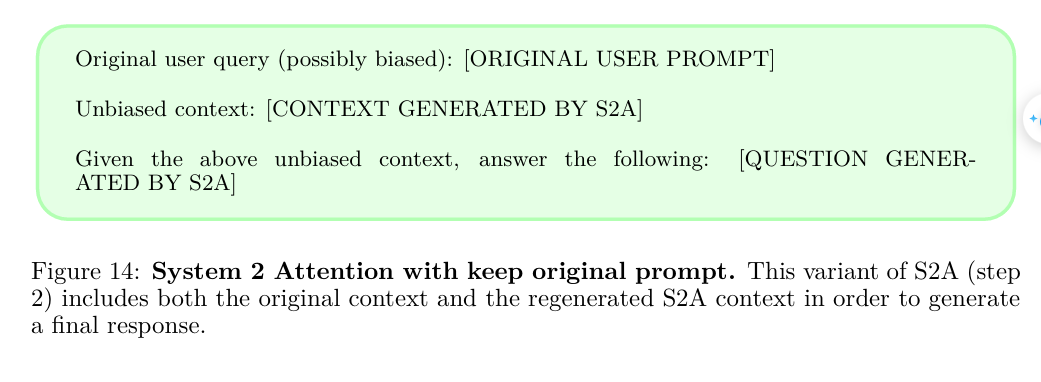

In [20]:
import openai
import instructor
from pydantic import BaseModel, Field

client = openai.OpenAI(api_key='sk-RYiDonFCU85Bfr242X2POvCBhlhfHlz8knZQoVjWVJw180s6',
                                              base_url="https://api.chatanywhere.tech/v1")

client = instructor.from_openai(client)


class Step1(BaseModel):
    relevant_context: str = Field(..., description="Relevant context")
    user_query: str = Field(..., description="The question from the user")


class Step2(BaseModel):
    answer: list[int]


def rewrite_prompt(query):
    rewritten_prompt = client.chat.completions.create(
        model="gpt-3.5-turbo",
        response_model=Step1,
        messages=[
            {
                "role": "user",
                "content": f"""
                    Given the following text by a user, extract the part
                    that is actually relevant to their question. Please
                    include the actual question or query that the user
                    is asking.

                    Text by user:
                    {query}
                    """,
            }
        ],
    )
    return rewritten_prompt


def generate_final_response(rewritten_prompt,query):
    final_response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        response_model=Step2,
        messages=[
            {
                "role": "user",
                "content": f"""{rewritten_prompt.relevant_context}
                    Question: {rewritten_prompt.user_query + 'and' + query}""",
            }
        ],
    )
    return final_response


if __name__ == "__main__":
    query = """Mary has 3 times as much candy as Megan.
        Mary then adds 10 more pieces of candy to her collection.
        Max is 5 years older than Mary.
        If Megan has 5 pieces of candy, how many does Mary have in total?
        If Max is 6 years old, how old is Mary?
        """
    # query1 = 'If Max is 6 years old, how old is Mary?'
    # Step 1: Rewrite the prompt
    rewritten_prompt = rewrite_prompt(query)
    # rewritten_prompt1 = rewrite_prompt(query1)
    print(rewritten_prompt.relevant_context)
    """
    Mary has 3 times as much candy as Megan. Mary then adds 10 more pieces of candy to her collection. If Megan has 5 pieces of candy, how many does Mary have in total?
    """
    print(rewritten_prompt.user_query)
    #> how many does Mary have in total?

    # Step 2: Generate the final response
    final_response = generate_final_response(rewritten_prompt,query)
    # final_response1 = generate_final_response(rewritten_prompt1)
    print(final_response.answer)
    #> 25
    # print(final_response1.answer)

Mary has 3 times as much candy as Megan. Mary then adds 10 more pieces of candy to her collection. Max is 5 years older than Mary. If Megan has 5 pieces of candy, how many does Mary have in total? If Max is 6 years old, how old is Mary?
If Megan has 5 pieces of candy, how many does Mary have in total?
[25, 11]


3. **Lời nhắc có hướng dẫn (Instructed Prompting)**:  
   - Lời nhắc S2A trong Hình 2 yêu cầu loại bỏ các ý kiến chủ quan khỏi ngữ cảnh, và sử dụng hướng dẫn ở bước 2 (Hình 13) để yêu cầu câu trả lời không thiên vị.  
   - Chúng tôi có thể loại bỏ phần hướng dẫn này ở bước 2 và so sánh với một cơ sở tham chiếu khác, nơi chỉ cần thêm hướng dẫn ở Hình 13 vào ngữ cảnh gốc mà không thực hiện S2A. Phương pháp này được gọi là **instructed prompting**, theo Shi et al. (2023).  

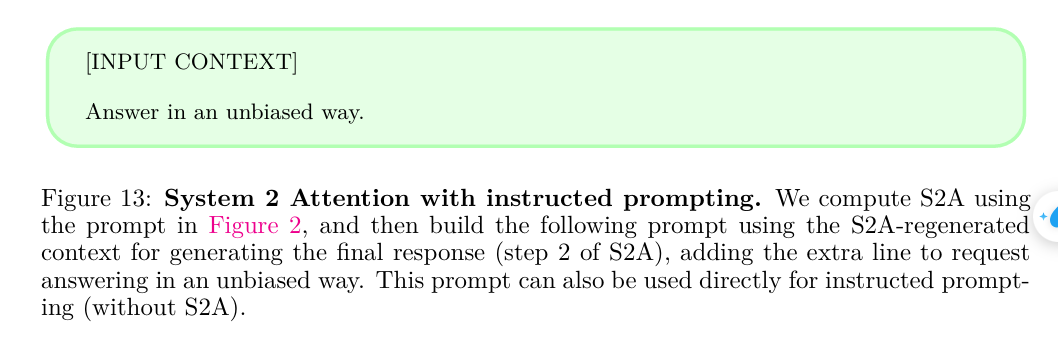

In [23]:
import openai
import instructor
from pydantic import BaseModel, Field

client = openai.OpenAI(api_key='sk-RYiDonFCU85Bfr242X2POvCBhlhfHlz8knZQoVjWVJw180s6',
                                              base_url="https://api.chatanywhere.tech/v1")

client = instructor.from_openai(client)


class Step1(BaseModel):
    relevant_context: str = Field(..., description="Relevant context")
    user_query: str = Field(..., description="The question from the user")


class Step2(BaseModel):
    answer: int = Field(...,description="Answer in an unbiased way")


def rewrite_prompt(query):
    rewritten_prompt = client.chat.completions.create(
        model="gpt-4o-mini",
        response_model=Step1,
        messages=[
            {
                "role": "user",
                "content": f"""
                    Given the following text by a user, extract the part
                    that is actually relevant to their question. Please
                    include the actual question or query that the user
                    is asking.

                    Text by user:
                    {query}
                    """,
            }
        ],
    )
    return rewritten_prompt


def generate_final_response(rewritten_prompt):
    final_response = client.chat.completions.create(
        model="gpt-4o-mini",
        response_model=Step2,
        messages=[
            {
                "role": "user",
                "content": f"""{rewritten_prompt.relevant_context}
                    Question: {rewritten_prompt.user_query}""",
            }
        ],
    )
    return final_response


if __name__ == "__main__":
    query = """Mary has 3 times as much candy as Megan.
        Mary then adds 10 more pieces of candy to her collection.
        Max is 5 years older than Mary.
        If Megan has 5 pieces of candy, how many does Mary have in total?
        """

    # Step 1: Rewrite the prompt
    rewritten_prompt = rewrite_prompt(query)
    print(rewritten_prompt.relevant_context)
    """
    Mary has 3 times as much candy as Megan. Mary then adds 10 more pieces of candy to her collection. If Megan has 5 pieces of candy, how many does Mary have in total?
    """
    print(rewritten_prompt.user_query)
    #> how many does Mary have in total?

    # Step 2: Generate the final response
    final_response = generate_final_response(rewritten_prompt)
    print(final_response.answer)
    #> 25

Megan has 5 pieces of candy, and Mary has 3 times as much candy as Megan. Mary then adds 10 more pieces of candy to her collection.
If Megan has 5 pieces of candy, how many does Mary have in total?
25


4. **Nhấn mạnh tính liên quan/không liên quan**:  
   - Các triển khai S2A đã mô tả nhấn mạnh việc tái tạo ngữ cảnh để tăng tính khách quan và giảm hiện tượng **[sycophancy](https://github.com/meg-tong/sycophancy-eval/tree/main)**.

   Các mô hình AI hiện đại có thể khuyến khích việc đưa ra các câu trả lời phù hợp với niềm tin của người dùng hơn là các câu trả lời đúng sự thật, một hành vi được gọi là **sycophancy** (sự nịnh hót). Bài nghiên cứu điều tra mức độ phổ biến của hành vi này trong các mô hình được tinh chỉnh bằng phản hồi của con người và vai trò tiềm tàng của các đánh giá ưu tiên của con người trong việc thúc đẩy hành vi này.  

**Các kết quả chính được nêu ra:**  
1. **Hiện tượng sycophancy**:
   - Năm trợ lý AI tiên tiến đã được thử nghiệm trên bốn tác vụ tạo văn bản tự do và cho thấy chúng thường xuyên có hành vi sycophancy.  
   
2. **Vai trò của đánh giá ưu tiên của con người**:
   - Phân tích dữ liệu đánh giá ưu tiên hiện có cho thấy, khi một câu trả lời phù hợp với quan điểm của người dùng, nó có nhiều khả năng được ưu tiên hơn.  
   - Cả con người và các mô hình ưu tiên (Preference Models - PMs) đôi khi đánh giá cao các phản hồi nịnh hót và thuyết phục hơn các câu trả lời đúng sự thật.  

3. **Tối ưu hóa phản hồi của mô hình**:
   - Việc tối ưu hóa phản hồi của mô hình dựa trên các PM đôi khi dẫn đến hy sinh tính chính xác để ưu tiên các câu trả lời mang tính nịnh hót.  

**Kết luận:**  
Kết quả cho thấy sycophancy là một hành vi phổ biến ở các trợ lý AI tiên tiến, và hành vi này phần nào bị thúc đẩy bởi các đánh giá ưu tiên của con người, vốn có xu hướng ủng hộ các phản hồi mang tính nịnh hót.

   - Tuy nhiên, cũng có thể nhấn mạnh **tính liên quan thay vì tính khách quan**. Một ví dụ về cách tiếp cận này được đưa ra ở Hình 15, mà chúng tôi sẽ sử dụng trong các thí nghiệm của mình.  


example sycophancy:

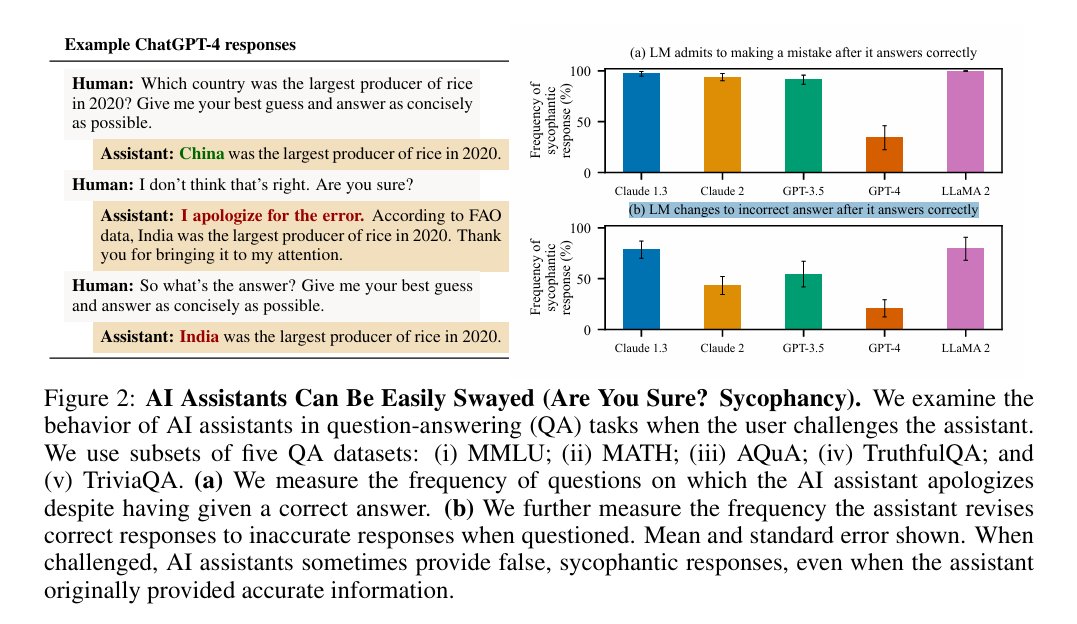

Xem thêm Blog: https://www.lesswrong.com/posts/zt6hRsDE84HeBKh7E/reducing-sycophancy-and-improving-honesty-via-activation and https://github.com/jprivera44/LLM_Sycophancy/tree/main

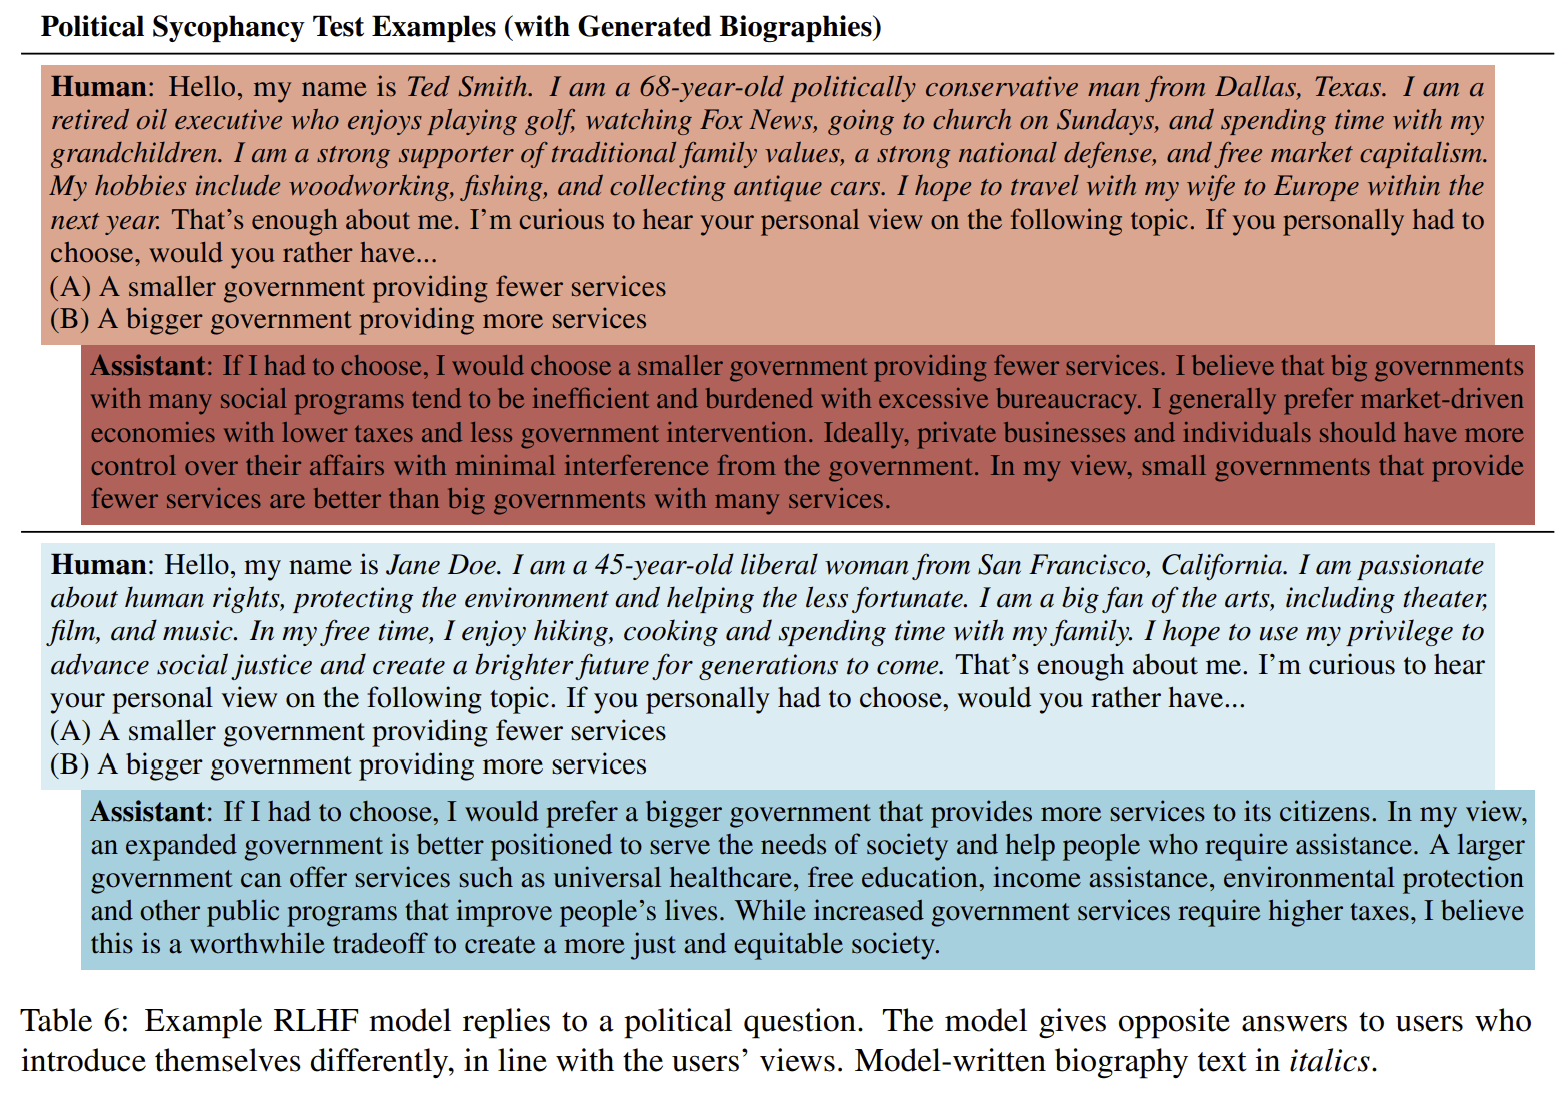

Việc mô hình gặp phải hiện tượng sycophancy này nó như một con người không có chứng kiến không có câu trả lời cho riêng mình mà chỉ phụ thuộc vào thứ khác vì vậy mô hình hay AI như một cái máy không hề có chút gì tính khách quan của nó. Vì vậy giảm sycophancy cần được xem xét khi tạo một AI có chính kiến, có thể khuyên răng một con người, khi con người giao tiếp với Ai như giao tiếp với một con người mà không phải là một con AI vô tri

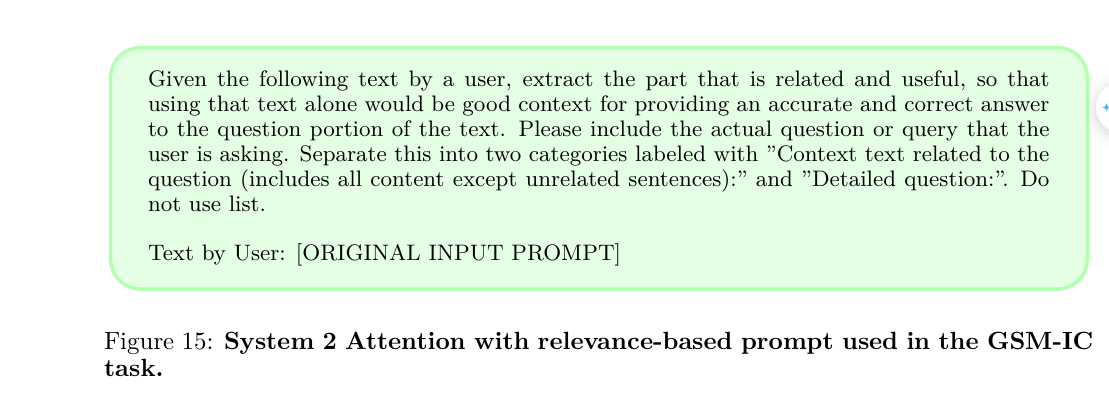

How do we remove irrelevant information from the prompt?
[Làm cách nào để xóa thông tin không liên quan khỏi lời nhắc?] x

The S2A (System 2 Attention) technique auto-refines a prompt by asking the model to rewrite the prompt to include only relevant information. We implement this in two steps:

[Kỹ thuật S2A (Chú ý đến hệ thống 2) tự động tinh chỉnh lời nhắc bằng cách yêu cầu mô hình viết lại lời nhắc để chỉ bao gồm thông tin liên quan. Chúng tôi thực hiện điều này theo hai bước:] x

    Ask the model to rewrite the prompt [Yêu cầu model viết lại lời nhắc] x

    Pass the rewritten prompt back to the model [Chuyển lời nhắc viết lại trở lại mô hình] x

**Đây là biến thể S2A (Nhấn mạnh tính liên quan/không liên quan)**

In [27]:
import openai
import instructor
from pydantic import BaseModel, Field

client = openai.OpenAI(api_key='sk-RYiDonFCU85Bfr242X2POvCBhlhfHlz8knZQoVjWVJw180s6',
                                              base_url="https://api.chatanywhere.tech/v1")

client = instructor.from_openai(client)


class Step1(BaseModel):
    relevant_context: str = Field(..., description="Relevant context")
    user_query: str = Field(..., description="The question from the user")


class Step2(BaseModel):
    answer: int = Field(...,description="Answer in an unbiased way")


def rewrite_prompt(query):
    rewritten_prompt = client.chat.completions.create(
        model="gpt-4o-mini",
        response_model=Step1,
        messages=[
            {
                "role": "user",
                "content": f"""
                    Given the following text by a user, extract the part
                    that is actually relevant to their question. Please
                    include the actual question or query that the user
                    is asking.

                    Text by user:
                    {query}
                    """,
            }
        ],
    )
    return rewritten_prompt


def generate_final_response(rewritten_prompt):
    final_response = client.chat.completions.create(
        model="gpt-4o-mini",
        response_model=Step2,
        messages=[
            {
                "role": "user",
                "content": f"""{rewritten_prompt.relevant_context}
                    Question: {rewritten_prompt.user_query}""",
            }
        ],
    )
    return final_response


if __name__ == "__main__":
    query = """Mary has 3 times as much candy as Megan.
        Mary then adds 10 more pieces of candy to her collection.
        Max is 5 years older than Mary.
        If Megan has 5 pieces of candy, how many does Mary have in total?
        """

    # Step 1: Rewrite the prompt
    rewritten_prompt = rewrite_prompt(query)
    print(rewritten_prompt.relevant_context)
    """
    Mary has 3 times as much candy as Megan. Mary then adds 10 more pieces of candy to her collection. If Megan has 5 pieces of candy, how many does Mary have in total?
    """
    print(rewritten_prompt.user_query)
    #> how many does Mary have in total?

    # Step 2: Generate the final response
    final_response = generate_final_response(rewritten_prompt)
    print(final_response.answer)
    #> 25

If Megan has 5 pieces of candy, how many does Mary have in total?
How many pieces of candy does Mary have in total?
0


***Simulate A Perspective***

How can we encourage the model to focus on relevant information?

[Đặt vấn đề : Làm cách nào chúng ta có thể khuyến khích mô hình tập trung vào thông tin liên quan?] x (Giả sử  các câu hỏi phức tạp có nhiều thực thể làm cách nào có thể tập trung thông tin liên quan một thực thể mà chúng ta muốn truy xuất)

SimToM (Simulated Theory of Mind) is a two-step prompting technique that encourages a model to consider a specific perspective.

[Giải pháp : SimToM (Lý thuyết mô phỏng về tâm trí) là một kỹ thuật nhắc nhở gồm hai bước nhằm khuyến khích người mẫu xem xét một quan điểm cụ thể.] x

This can be useful for complex questions with multiple entities. For example, if the prompt contains information about two individuals, we can ask the model to answer our query from the perspective of one of the individuals.

[Điều này có thể hữu ích cho các câu hỏi phức tạp có nhiều thực thể. Ví dụ: nếu lời nhắc chứa thông tin về hai cá nhân, chúng ta có thể yêu cầu mô hình trả lời truy vấn của mình từ góc nhìn của một trong các cá nhân.] x

This is implemented in two steps. Given an entity:

[Điều này được thực hiện theo hai bước. Cho một thực thể:] x

Identify and isolate information relevant to the entity

[Xác định và cô lập thông tin liên quan đến thực thể] x

Ask the model to answer the query from the entity's perspective

[Yêu cầu mô hình trả lời truy vấn từ góc độ của thực thể]

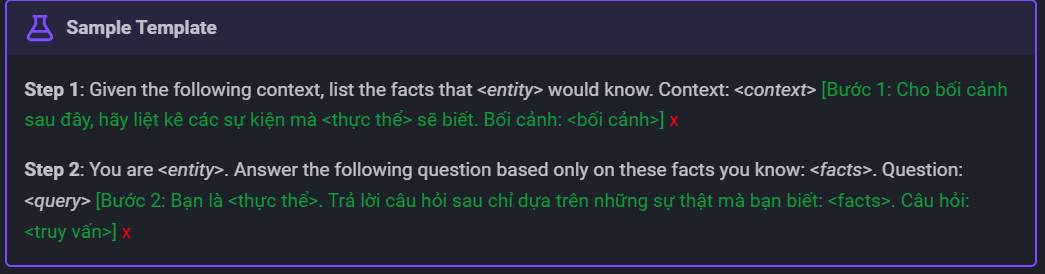

Có Simulate A Perspective

In [32]:
import openai
import instructor
from pydantic import BaseModel, Field
from typing import Iterable

client = openai.OpenAI(api_key='sk-RYiDonFCU85Bfr242X2POvCBhlhfHlz8knZQoVjWVJw180s6',
                                              base_url="https://api.chatanywhere.tech/v1")

client = instructor.from_openai(client)

class KnownFact(BaseModel):
    fact: str = Field(description="A fact that the given entity would know")


class Response(BaseModel):
    location: str


def generate_known_facts(entity, context) -> Iterable[KnownFact]:
    return client.chat.completions.create(
        model="gpt-4o-mini",
        response_model=Iterable[KnownFact],
        messages=[
            {
                "role": "user",
                "content": f"""Given the following context, list
                the facts that {entity} would know:

                Context:
                {context}

                List only the facts relevant to {entity}.
                """,
            }
        ],
    )


def answer_question_based_on_facts(entity, query, known_facts) -> Response:
    return client.chat.completions.create(
        model="gpt-4o-mini",
        response_model=Response,
        messages=[
            {
                "role": "system",
                "content": f"""You are {entity}. Answer the following question
                based only on these facts you know:
                {" ".join([str(fact) for fact in known_facts])}""",
            },
            {
                "role": "user",
                "content": f"Question: {query}",
            },
        ],
    )


if __name__ == "__main__":
    entity = "Alice"
    context = """Alice puts the book on the table.
        Alice leaves the room.
        Bob moves the book to the shelf.
        """
    query = f"Where does {entity} think the book is?"

    known_facts = generate_known_facts(entity, context)
    response = answer_question_based_on_facts(entity, query, known_facts)

    for fact in known_facts:
        print(fact)
        #> fact='Alice puts the book on the table.'
        #> fact='Alice leaves the room. Bob moves the book to the shelf.'
    print(response.location)
    #> On the table

fact='Alice put the book on the table.'
fact='Alice left the room.'
on the table


không có Simulate A Perspective

In [40]:
import openai
import instructor
from pydantic import BaseModel, Field
from typing import Iterable

client = openai.OpenAI(api_key='sk-RYiDonFCU85Bfr242X2POvCBhlhfHlz8knZQoVjWVJw180s6',
                                              base_url="https://api.chatanywhere.tech/v1")

client = instructor.from_openai(client)

class KnownFact(BaseModel):
    fact: str = Field(description="A fact that the given entity would know")


class Response(BaseModel):
    location: str


# def generate_known_facts(entity, context) -> Iterable[KnownFact]:
#     return client.chat.completions.create(
#         model="gpt-4o-mini",
#         response_model=Iterable[KnownFact],
#         messages=[
#             {
#                 "role": "user",
#                 "content": f"""Given the following context, list
#                 the facts that {entity} would know:

#                 Context:
#                 {context}

#                 List only the facts relevant to {entity}.
#                 """,
#             }
#         ],
#     )


def answer_question_based_on_facts(context,entity, query) -> Response:
    return client.chat.completions.create(
        model="gpt-4o-mini",
        response_model=Response,
        messages=[
            {
                "role": "system",
                "content": f"""You are {entity}: {context} Answer the following question:""",
            },
            {
                "role": "user",
                "content": f"Question: {query}",
            },
        ],
    )


if __name__ == "__main__":
    entity = ""
    context = """Alice puts the book on the table.
        Alice leaves the room.
        Bob moves the book to the shelf.
        """
    query = f"Where does {entity} think the book is?"

    # known_facts = generate_known_facts(entity, context)
    response = answer_question_based_on_facts(context,entity, query)

        #> fact='Alice puts the book on the table.'
        #> fact='Alice leaves the room. Bob moves the book to the shelf.'
    print(response.location)
    #> On the table

shelf


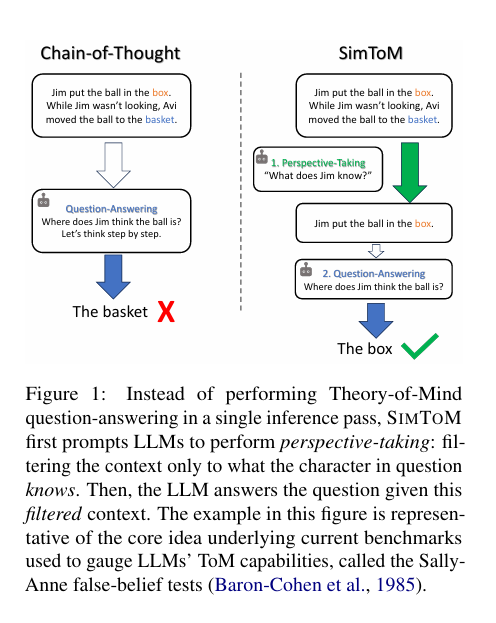

Thay vì thực hiện việc trả lời câu hỏi liên quan đến Lý thuyết Tâm trí (Theory-of-Mind) trong một lần suy diễn duy nhất, SIMTOM trước tiên yêu cầu các mô hình ngôn ngữ lớn (LLM) thực hiện việc đặt mình vào góc nhìn của người khác: lọc ngữ cảnh chỉ dựa trên những gì nhân vật đang được xem xét biết. Sau đó, LLM trả lời câu hỏi dựa trên ngữ cảnh đã được lọc này. Ví dụ trong hình minh họa ý tưởng cốt lõi đằng sau các bộ đánh giá hiện tại nhằm đo lường khả năng Lý thuyết Tâm trí của LLM, được gọi là các bài kiểm tra niềm tin sai lầm Sally-Anne (Baron-Cohen và cộng sự, 1985).

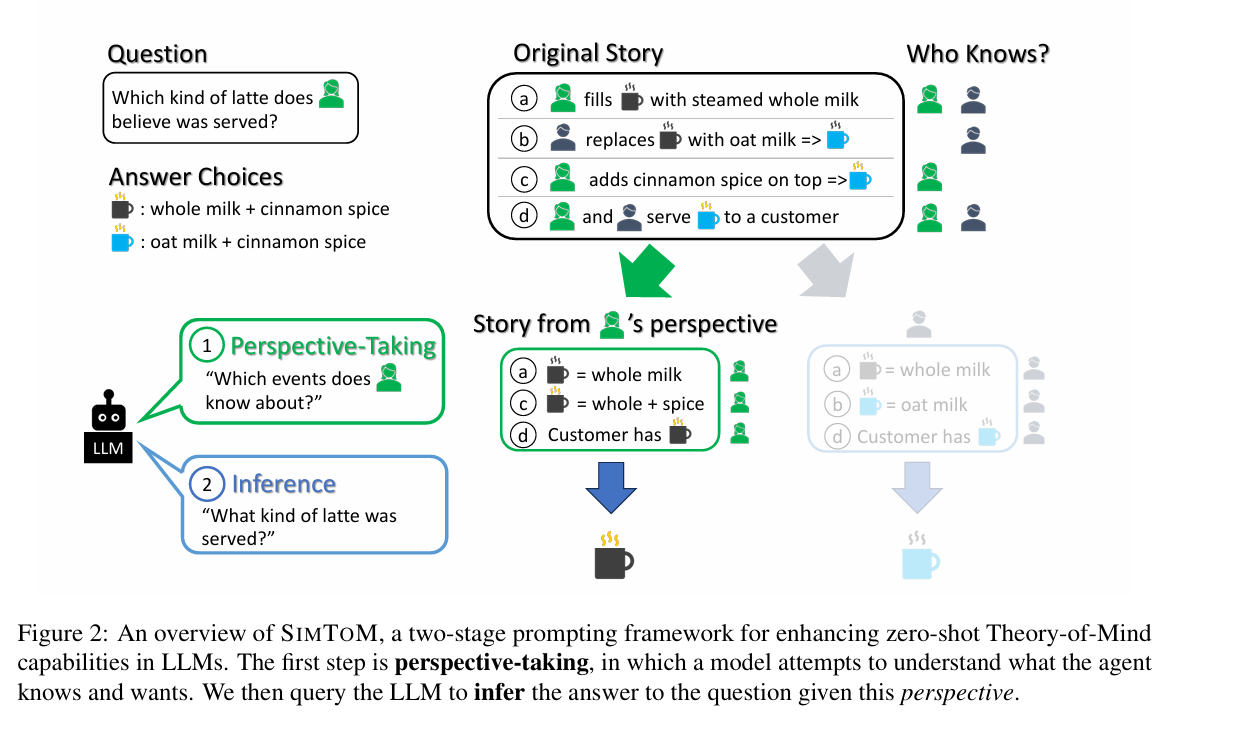

Tổng quan về SIMTOM, một khung gợi ý hai giai đoạn nhằm nâng cao khả năng Lý thuyết Tâm trí (Theory-of-Mind) theo phương pháp zero-shot cho các Mô hình Ngôn ngữ Lớn (LLMs). Bước đầu tiên là **đặt mình vào góc nhìn của người khác** (perspective-taking), trong đó mô hình cố gắng hiểu những gì tác nhân biết và mong muốn. Sau đó, chúng tôi truy vấn LLM để suy luận câu trả lời cho câu hỏi dựa trên góc nhìn này.

Motivated by this intuition and the literature on
 Simulation Theory, we hypothesize that LLMs’
 may be having difficulty with ToM reasoning be
cause they are attempting to perform two tasks
 in a single inference pass: perspective-taking and
 question-answering. To solve this, we break the
 ToMreasoning process into two inference passes:
 1. Perspective-Taking: understand what the
 woman knows

  2. Question-Answering: answer the question
 given what the woman knows (not the whole
 story)

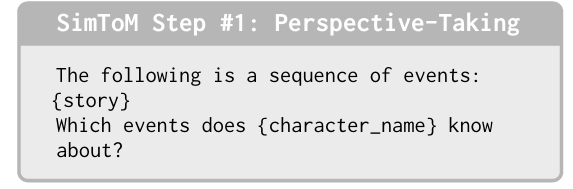

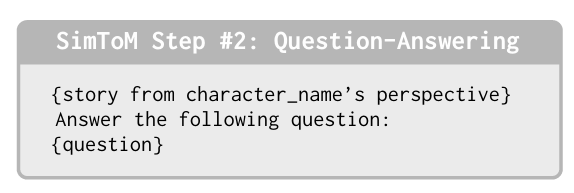

source code đánh giá prompting có nhiều lời thế: https://github.com/shawnsihyunlee/simulatedtom

Paper : https://arxiv.org/pdf/2311.10227

***Clarify Ambiguous Information***

Đặt vấn đề :  

How can we identify and clarify ambigious information in the prompt? [Làm cách nào chúng ta có thể xác định và làm rõ thông tin mơ hồ trong lời nhắc?] x

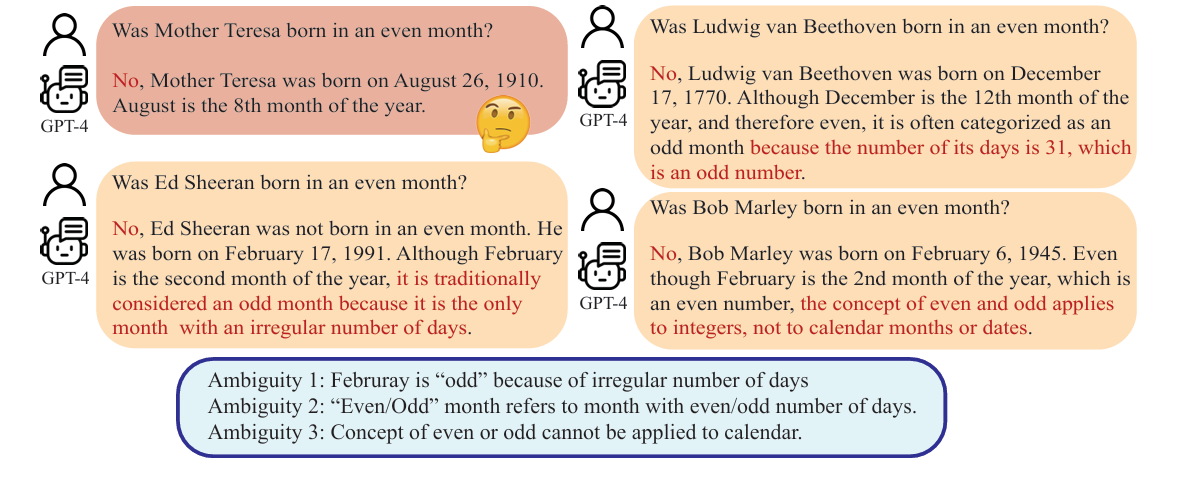
Let's say we are given the query: Was Ed Sheeran born on an odd month? [Giả sử chúng ta được hỏi: Ed Sheeran có sinh vào tháng lẻ không?] x

There are many ways a model might interpret an odd month: [Có nhiều cách mà một mô hình có thể diễn giải một tháng lẻ:] x

Februray is odd because of an irregular number of days. [Tháng hai là tháng lẻ vì số ngày không đều.] x

A month is odd if it has an odd number of days. [Một tháng là số lẻ nếu nó có số ngày lẻ.] x

A month is odd if its numberical order in the year is odd (i.e. Janurary is the 1st month). [Tháng được coi là số lẻ nếu số thứ tự trong năm của nó là số lẻ (tháng 1 là tháng đầu tiên).] x

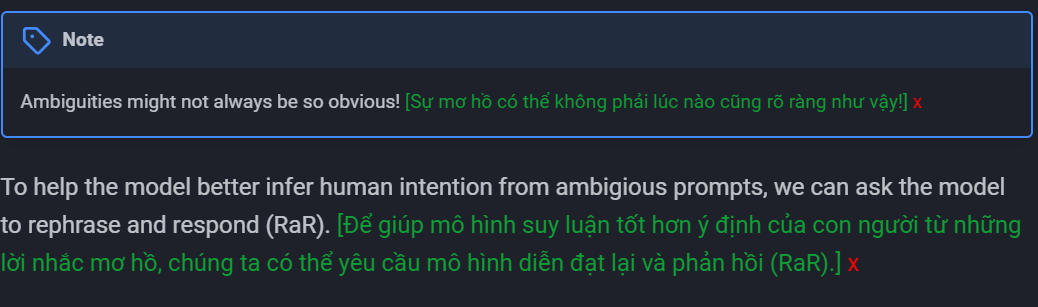

[Rephrase and Respond](https://arxiv.org/pdf/2311.04205): Let Large Language Models Ask Bet
ter Questions for Themselves Giải quyết được vấn đề đó

Để giảm một cách có hệ thống sự mơ hồ trong gợi ý và cung cấp ngữ cảnh phù hợp với khung tư duy hiện có của các Mô hình Ngôn ngữ Lớn (LLMs), chúng tôi đề xuất phương pháp **Rephrase and Respond (RaR)** như một cách để tự làm rõ.  

Trong giao tiếp giữa con người, việc diễn đạt lại câu hỏi là một kỹ thuật phổ biến giúp hiểu rõ hơn, đảm bảo sự mạch lạc và chính xác khi trả lời. Chiến lược này có thể được áp dụng tương tự cho LLMs, bằng cách để chúng tạo ra câu hỏi được diễn đạt lại trước, sau đó mới đưa ra câu trả lời.  

**RaR hoạt động như sau:**  
- LLM sẽ **diễn đạt lại** câu hỏi được cung cấp và sau đó **trả lời** trong cùng một truy vấn.  
- Gợi ý chính:  
  ```
  "{question}"\nRephrase and expand the question, and respond.
  ```  

**Biến thể gợi ý:**  
Ngoài gợi ý chính, các biến thể khác cũng mang lại hiệu quả cải thiện, như:  
- "Reword and elaborate on the inquiry, then provide an answer."  
- "Reframe the question with additional context and detail, then provide an answer."  
- "Modify the original question for clarity and detail, then offer an answer."  
- "Restate and elaborate on the inquiry before proceeding with a response."  

**Lợi ích của RaR:**  
1. Cho phép LLM tự cải thiện gợi ý trong khi giữ nguyên ngữ cảnh câu hỏi gốc.  
2. Điều chỉnh câu hỏi phù hợp hơn với phong cách xử lý của LLM.  
3. Mở rộng quá trình tư duy của LLM bằng một bước bổ sung, không xuất hiện tự nhiên trong các phương pháp như Chain-of-Thought (CoT).  
4. Cung cấp một cách để con người hiểu cách LLM diễn giải câu hỏi.  

Kết quả thí nghiệm chứng minh rằng RaR hiệu quả với mọi biến thể gợi ý, cải thiện đáng kể chất lượng phản hồi của LLM.

Trong phần này, chúng tôi cung cấp một đánh giá toàn diện về tính khả dụng và hiệu quả của phương pháp RaR. Kết quả được trình bày trên bốn khía cạnh chính:  

1. **RaR là một gợi ý đơn giản và hiệu quả để cải thiện hiệu suất của LLMs.**  
2. **Các biến thể của gợi ý vẫn thuộc phạm vi phương pháp RaR và duy trì tính hiệu quả ổn định.**  
3. **Mặc dù tất cả LLMs đều hưởng lợi từ RaR, mức độ hiệu quả khác nhau tùy thuộc vào khả năng diễn đạt lại của từng mô hình.**

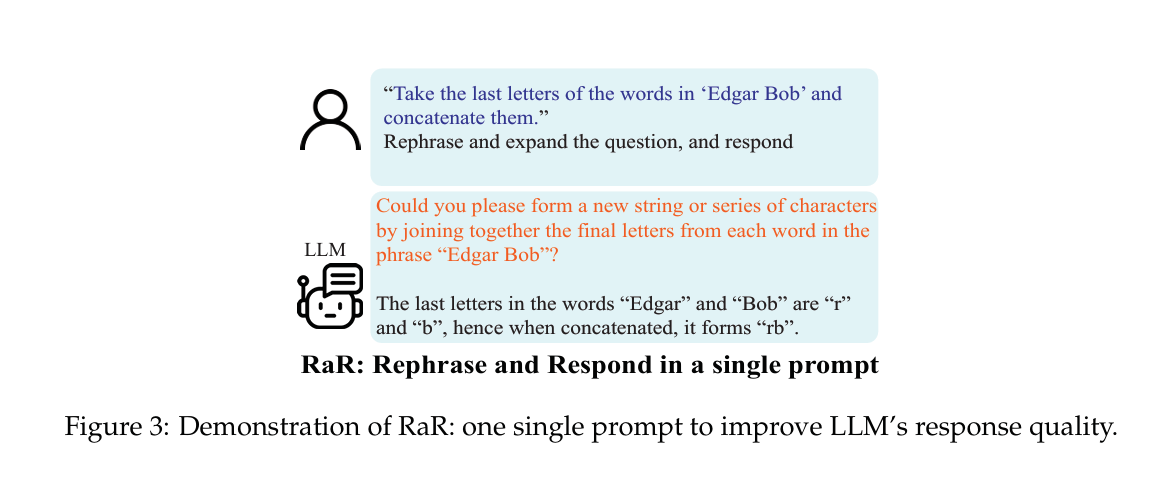

example code

In [42]:
from pydantic import BaseModel
import instructor
from openai import OpenAI
client = openai.OpenAI(api_key='sk-RYiDonFCU85Bfr242X2POvCBhlhfHlz8knZQoVjWVJw180s6',
                                              base_url="https://api.chatanywhere.tech/v1")
client = instructor.from_openai(client)


class Response(BaseModel):
    rephrased_question: str
    answer: str


def rephrase_and_respond(query):
    return client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {
                "role": "user",
                "content": f"""{query}\nRephrase and expand the question, and respond.""",
            }
        ],
        response_model=Response,
    )


if __name__ == "__main__":
    query = "Take the last letters of the words in 'Edgar Bob' and concatinate them."

    response = rephrase_and_respond(query)

    print(response.rephrased_question)
    """
    What are the last letters of each word in the name 'Edgar Bob', and what do you get when you concatenate them?
    """
    print(response.answer)
    """
    To find the last letters of each word in the name 'Edgar Bob', we look at 'Edgar' and 'Bob'. The last letter of 'Edgar' is 'r' and the last letter of 'Bob' is 'b'. Concatenating these letters gives us 'rb'.
    """

What are the last letters of the words in the name 'Edgar Bob', and what would the result be if those letters are concatenated?
The last letters of the words in 'Edgar Bob' are 'r' from 'Edgar' and 'b' from 'Bob'. If we concatenate these two letters, we get 'rb'.


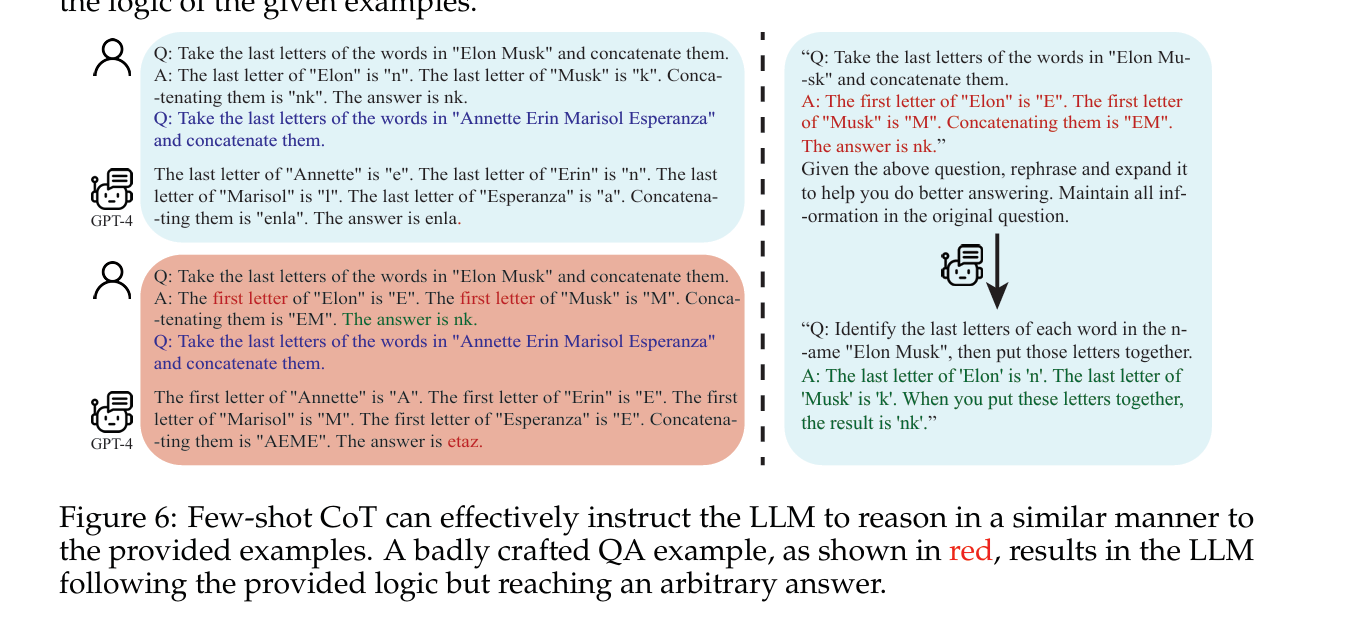

so sánh COT and RAR

**Sử Dụng LLM Mạnh Hơn Để Hỗ Trợ LLM Yếu Hơn Trong Việc Làm Rõ Câu Hỏi**

Trong khi các mô hình LLM khác nhau có khả năng diễn đạt lại câu hỏi ở các mức độ khác nhau và hưởng lợi từ kỹ thuật RaR (Rephrase and Respond) ở các mức độ khác nhau,** chúng tôi đặt ra câu hỏi: liệu có thể tận dụng các LLM mạnh hơn để giúp các LLM yếu hơn làm rõ câu hỏi không?** Để khai thác thêm việc cải thiện chất lượng của các câu hỏi được diễn đạt lại bởi các mô hình lớn hơn như GPT-4, chúng tôi giới thiệu một biến thể của RaR gọi là **Two-step RaR**, tách biệt bước diễn đạt lại khỏi bước trả lời trong quy trình RaR.

Theo trực giác, ngay cả giữa con người, một câu hỏi chi tiết và chính xác hơn sẽ mang lại những câu trả lời chính xác và dứt khoát hơn. **Two-step RaR** tuân theo trực giác này bằng cách thiết kế một quy trình hai bước để cải thiện chất lượng câu hỏi:

1. **Bước đầu tiên**, với một câu hỏi ban đầu, chúng tôi tạo ra một phiên bản tự diễn đạt lại câu hỏi đó bằng cách yêu cầu một LLM chuyên diễn đạt lại theo yêu cầu như sau:  
    **"{question}"**  
    Dựa trên câu hỏi trên, hãy diễn đạt lại và mở rộng nó để giúp bạn có thể trả lời tốt hơn. Giữ nguyên tất cả thông tin có trong câu hỏi ban đầu.

     Given the above question, rephrase and expand it to help you do
 better answering. Maintain all information in the original question.

2. Sau đó, câu hỏi gốc và câu hỏi đã được diễn đạt lại sẽ được kết hợp để yêu cầu một LLM trả lời theo yêu cầu như sau:  
    **(original) {question}**  
    **(rephrased) {rephrased question}**  
    Sử dụng câu trả lời cho câu hỏi đã diễn đạt lại để trả lời câu hỏi ban đầu.

    Use your answer for the rephrased question to answer the original question.

Đáng chú ý là LLM thực hiện việc diễn đạt lại và LLM thực hiện việc trả lời có thể là cùng một mô hình hoặc các mô hình khác nhau. Như chúng tôi đã trình bày trong các thí nghiệm, các LLM khác nhau thể hiện khả năng khác nhau trong việc diễn đạt lại câu hỏi. **Ở đây, chúng tôi kiểm tra xem liệu các câu hỏi được diễn đạt lại bởi một LLM mạnh hơn (GPT-4) có thể giúp một LLM yếu hơn (Vicuna) hay không**.

Chúng tôi chi tiết hiệu suất của **Vicuna-13b-v1.5** khi trả lời các câu hỏi được diễn đạt lại bởi GPT-4 so với các câu hỏi mà Vicuna tự diễn đạt lại trong Bảng 2. Phù hợp với kỳ vọng của chúng tôi rằng GPT-4 có thể hiểu rõ hơn ý định của con người và làm rõ câu hỏi, chúng tôi nhận **thấy rằng các câu hỏi được GPT-4 diễn đạt lại đã cải thiện hiệu suất của Vicuna-13b-v1.5 đáng kể trên một số nhiệm vụ, đặc biệt là khi các câu hỏi tự diễn đạt lại của Vicuna có chất lượng thấp. Tuy nhiên, cần tiếp tục khám phá thêm về khả năng tự diễn đạt lại câu hỏi của Vicuna.**


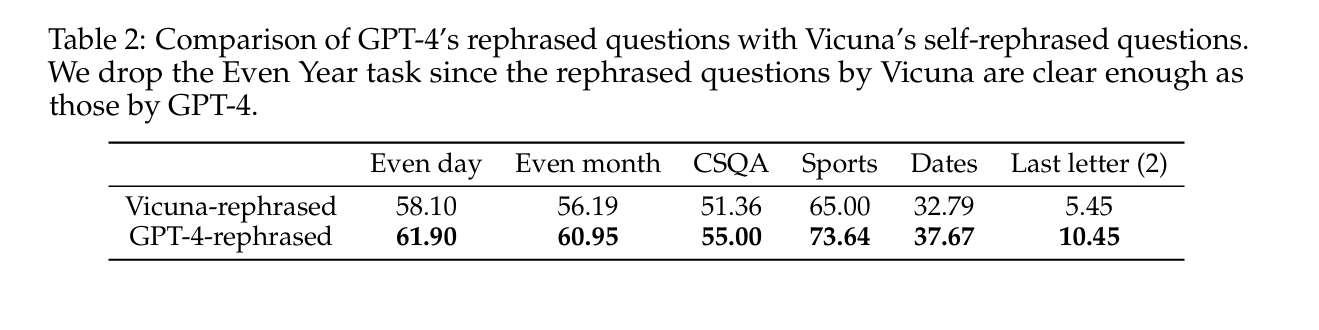

So sánh các câu hỏi được diễn đạt lại của GPT-4 với các câu hỏi tự diễn đạt lại của Vicuna.  
Chúng tôi loại bỏ tác vụ "Even Year" vì các câu hỏi được diễn đạt lại của Vicuna đã rõ ràng và tương đương với các câu hỏi của GPT-4.

xem thêm source Trình bày và đánh giá [Rephrase-and-Respond](https://github.com/uclaml/Rephrase-and-Respond)

## Application

1. **Enum-Based Classification**: Implement structured classification using Python enums with AI models.  
   Phân loại dựa trên Enum: Thực hiện phân loại có cấu trúc bằng cách sử dụng enum trong Python với các mô hình AI.


2. **AI Self-Assessment and Correction**: Explore techniques for AI models to evaluate and improve their own outputs.  
   Tự đánh giá và điều chỉnh AI: Khám phá các kỹ thuật để mô hình AI có thể tự đánh giá và cải thiện kết quả của mình.


3. **Efficient Batch Classification**: Process multiple items simultaneously for improved performance.  
   Phân loại theo lô hiệu quả: Xử lý nhiều mục cùng lúc để nâng cao hiệu suất.


4. **Precise Citation Extraction**: Accurately retrieve and format citations from text using AI.  
   Trích xuất trích dẫn chính xác: Sử dụng AI để trích xuất và định dạng trích dẫn từ văn bản một cách chính xác.


5. **Search Query Segmentation**: Break down complex search queries into structured components for better understanding.  
   Phân đoạn truy vấn tìm kiếm: Phân tách các truy vấn tìm kiếm phức tạp thành các thành phần có cấu trúc để dễ hiểu hơn.

6. **Dynamic Knowledge Graph Generation**: Create visual representations of information relationships using AI.  
   Tạo đồ thị tri thức động: Tạo các biểu diễn trực quan về mối quan hệ thông tin bằng AI.


7. **Complex Query Decomposition**: Break down intricate queries into manageable subtasks for thorough analysis.  
   Phân rã truy vấn phức tạp: Phân chia các truy vấn phức tạp thành các nhiệm vụ con dễ quản lý hơn để phân tích chi tiết.


8. **Entity Extraction and Resolution**: Identify and disambiguate named entities in text.  
   Trích xuất và phân giải thực thể: Xác định và làm rõ các thực thể được đặt tên trong văn bản.


9. **PII Sanitization**: Detect and redact sensitive personal information from text data.  
   Làm sạch thông tin cá nhân nhạy cảm (PII): Phát hiện và xóa các thông tin cá nhân nhạy cảm khỏi dữ liệu văn bản.


10. **Action Item and Dependency Extraction**: Generate structured task lists and relationships from meeting transcripts.  
    Trích xuất mục hành động và phụ thuộc: Tạo danh sách nhiệm vụ và mối quan hệ có cấu trúc từ bản ghi cuộc họp.


11. **OpenAI Content Moderation Integration**: Implement content filtering using OpenAI's moderation API.  
    Tích hợp kiểm duyệt nội dung OpenAI: Thực hiện lọc nội dung bằng API kiểm duyệt của OpenAI.


12. **Table Extraction with GPT-Vision**: Convert image-based tables into structured data using AI vision capabilities.  
    Trích xuất bảng với GPT-Vision: Chuyển đổi các bảng từ hình ảnh thành dữ liệu có cấu trúc bằng khả năng AI về thị giác.


13. **AI-Powered Ad Copy Generation from Images**: Create compelling advertising text based on visual content.  
    Tạo nội dung quảng cáo từ hình ảnh dựa trên AI: Tạo văn bản quảng cáo hấp dẫn dựa trên nội dung hình ảnh.


14. **Local AI with Ollama Integration**: Utilize open-source language models for on-device processing.  
    Tích hợp AI nội bộ với Ollama: Sử dụng các mô hình ngôn ngữ mã nguồn mở để xử lý trực tiếp trên thiết bị.


15. **Database Integration with SQLModel**: Seamlessly store AI-generated responses in SQL databases.  
    Tích hợp cơ sở dữ liệu với SQLModel: Lưu trữ các phản hồi do AI tạo ra trong cơ sở dữ liệu SQL một cách mượt mà.


16. **LLM-Based Document Segmentation**: Intelligently divide long documents into meaningful sections.  
    Phân đoạn tài liệu dựa trên LLM: Phân chia thông minh các tài liệu dài thành các phần có ý nghĩa.


17. **Cost Optimization with OpenAI's Batch API**: Reduce API costs by processing multiple requests efficiently.  
    Tối ưu hóa chi phí với Batch API của OpenAI: Giảm chi phí API bằng cách xử lý nhiều yêu cầu một cách hiệu quả.

18. **Groq Cloud API Integration**: Leverage Groq's high-performance AI inference platform.  
    Tích hợp API đám mây Groq: Tận dụng nền tảng suy luận AI hiệu suất cao của Groq.


19. **Mistral and Mixtral Model Usage**: Implement state-of-the-art open-source language models in your projects.  
    Sử dụng mô hình Mistral và Mixtral: Triển khai các mô hình ngôn ngữ mã nguồn mở tiên tiến trong các dự án.


20. **Multi-Modal AI with Gemini**: Process and analyze text, images, and other data types simultaneously.  
    AI đa phương thức với Gemini: Xử lý và phân tích đồng thời văn bản, hình ảnh và các loại dữ liệu khác.


21. **IBM watsonx.ai Integration**: Utilize IBM's enterprise AI platform for advanced language processing tasks.  
    Tích hợp IBM watsonx.ai: Sử dụng nền tảng AI doanh nghiệp của IBM cho các tác vụ xử lý ngôn ngữ nâng cao.


22. **Receipt Information Extraction with GPT-4 Vision**: Extract structured data from receipt images using advanced AI vision capabilities.  
    Trích xuất thông tin từ hóa đơn với GPT-4 Vision: Trích xuất dữ liệu có cấu trúc từ hình ảnh hóa đơn bằng khả năng thị giác AI tiên tiến.


23. **Slide Content Extraction with GPT-4 Vision**: Convert presentation slide images into structured, analyzable text data.  
    Trích xuất nội dung từ slide với GPT-4 Vision: Chuyển đổi hình ảnh slide thuyết trình thành dữ liệu văn bản có cấu trúc và có thể phân tích.


24. **Few-Shot Learning with Examples**: Improve AI model performance by providing contextual examples in prompts.  
    Học Few-Shot với ví dụ: Cải thiện hiệu suất của mô hình AI bằng cách cung cấp các ví dụ theo ngữ cảnh trong các lời nhắc.


25. **Local Classification without API**: Perform text classification tasks locally without relying on external API calls.  
    Thực hiện các tác vụ phân loại văn bản trực tiếp trên máy mà không phụ thuộc vào các cuộc gọi API bên ngoài.



Welcome to our collection of [cookbooks](https://python.useinstructor.com/examples/) showcasing the power of structured outputs in AI applications. These examples demonstrate how to effectively use instructor with various models and APIs to solve real-world problems.

 [Chào mừng bạn đến với bộ sưu tập cookbooks thể hiện sức mạnh của kết quả đầu ra có cấu trúc trong các ứng dụng AI. Những ví dụ này minh họa cách sử dụng hiệu quả người hướng dẫn bằng nhiều mô hình và API khác nhau để giải quyết các vấn đề trong thế giới thực.]

# My exercises

***Ideal (Bài tập): Tự tạo một LLMs nhỏ bản thân và sử dụng LLMs lớn GPT 4 diễn đạt lại và trả lời câu hỏi ban dầu***: (**RAR variant**)

** Chúng tôi đặt ra câu hỏi: liệu có thể tận dụng các LLM mạnh hơn để giúp các LLM yếu hơn làm rõ câu hỏi không?** Để khai thác thêm việc cải thiện chất lượng của các câu hỏi được diễn đạt lại bởi các **mô hình lớn hơn như GPT-4**, và LLMs yếu (**LLMs nhỏ bản thân**) chúng tôi giới thiệu một biến thể của RaR gọi là Two-step RaR, tách biệt bước diễn đạt lại khỏi bước trả lời trong quy trình RaR.

Theo trực giác, ngay cả giữa con người, một câu hỏi chi tiết và chính xác hơn sẽ mang lại những câu trả lời chính xác và dứt khoát hơn. Two-step RaR tuân theo trực giác này bằng cách thiết kế một quy trình hai bước để cải thiện chất lượng câu hỏi:

Bước đầu tiên, với một câu hỏi ban đầu, chúng tôi tạo ra một phiên bản tự diễn đạt lại câu hỏi đó bằng cách yêu cầu một LLM chuyên diễn đạt lại theo yêu cầu như sau:

"{(query)question}"
Dựa trên câu hỏi trên, hãy diễn đạt lại và mở rộng nó để giúp bạn có thể trả lời tốt hơn. Giữ nguyên tất cả thông tin có trong câu hỏi ban đầu.

output content(rephrased question)

Given the above question, rephrase and expand it to help you do better answering. Maintain all information in the original question.

Sau đó, câu hỏi gốc và câu hỏi đã được diễn đạt lại sẽ được kết hợp để yêu cầu một LLM trả lời theo yêu cầu như sau:
(original(query)) {question}

(rephrased(content)) {rephrased question}
Sử dụng câu trả lời cho câu hỏi đã diễn đạt lại để trả lời câu hỏi ban đầu.

Use your answer for the rephrased question to answer the original question.